In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,precision_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import time
import argparse
import tensorflow as tf
tf.enable_eager_execution()
import math
import collections


/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [147]:
import itertools

In [2]:
train_df = pd.read_csv("/home/sneha/personal_stuff/rs/Research Scientist/TrainingSet.csv")

In [193]:
test_df = pd.read_csv("/home/sneha/personal_stuff/rs/Research Scientist/TestingSet.csv")
dataset = dataset.fillna(np.nan)

In [3]:
train_df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V211,V212,V213,V214,V215,V216,V217,V218,V219,Machine_State
1183,0.0,14.597589,0.0000,20.06250,6.402024,5853.63300,19.540650,0.0,14.597589,0.0000,...,0.000000,0.745117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Good
3207,0.0,2.541849,0.1250,3.09375,0.756647,1019.28125,2.606250,0.0,2.541849,0.1250,...,-0.128265,0.604492,0.759766,0.663539,0.524414,0.817383,0.075382,266.079109,-0.187890,Bad
1697,0.0,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.0000,...,-0.003809,0.696008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bad
2124,0.0,17.517714,0.1875,21.03130,5.022595,7024.60330,19.362525,0.0,17.517480,0.1875,...,0.000226,0.414063,-0.086939,-0.131928,-0.387207,0.076355,0.112961,-52.903147,-0.003424,Good
1497,0.0,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.0000,...,-0.173578,0.871094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Good


In [4]:
train_df["Machine_State"] = train_df["Machine_State"].map(lambda i: 1 if i=="Good" else 0)

In [5]:
train_df["Machine_State"].sum()

3240

In [6]:
train_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V211,V212,V213,V214,V215,V216,V217,V218,V219,Machine_State
count,3666.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3666.000000,3722.000000,3722.000000,...,3722.000000,3722.000000,3666.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000
mean,0.266931,12.798785,0.822130,17.949045,4.597484,5132.068836,13.805802,0.266604,12.747066,0.821811,...,-0.037076,0.643070,0.052535,0.060923,-0.011771,0.135434,0.036057,24.431609,0.001456,0.870500
std,0.747814,14.201282,1.757249,20.823095,5.615069,5694.037354,17.475270,0.747253,13.907966,1.756789,...,0.221652,0.269465,0.218745,0.224290,0.219181,0.264025,0.047914,89.947533,0.110434,0.335798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-52.215660,0.000000,0.000000,0.000000,...,-3.001175,0.000000,-1.341688,-0.909258,-1.341740,-0.725586,0.000000,-364.612598,-0.693518,0.000000
25%,0.000000,3.372857,0.000000,5.234375,1.016262,1352.515625,0.164844,0.000000,3.372857,0.000000,...,-0.102240,0.571289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,9.692382,0.187500,13.781300,3.467487,3892.632300,9.604720,0.000000,9.690276,0.187500,...,0.000000,0.750977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.193750,17.999983,1.093750,24.875000,6.266688,7214.048488,19.999239,0.193750,18.008946,1.093750,...,0.057480,0.822266,0.065958,0.063689,0.000000,0.231460,0.067870,25.539183,0.000000,1.000000
max,26.703160,140.267266,40.531300,203.219000,58.925476,56247.173450,167.475175,26.696900,115.649522,40.531300,...,1.062738,0.904297,0.974005,0.987967,0.766907,1.136720,0.333398,396.174863,0.725586,1.000000


In [7]:
len(train_df)

3722

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Columns: 220 entries, V1 to Machine_State
dtypes: float64(204), int64(16)
memory usage: 6.2 MB


In [9]:
train_df.isnull().sum()

V1               56
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8               56
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15              56
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22              56
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
V29              56
V30               0
                 ..
V191              0
V192              0
V193              0
V194              0
V195              0
V196              0
V197             56
V198              0
V199              0
V200              0
V201              0
V202              0
V203              0
V204              0
V205             56
V206              0
V207              0
V208              0
V209              0


In [10]:
def detect_outliers(df,n):
    outlier_indices = []
    for feature in df:
        Q1 = np.percentile(df[feature],25)
        Q3 = np.percentile(df[feature],75)
        IQR = Q3-Q1
        outlier_step = 1.5*IQR
        #print(outlier_step)
        outlier_list_col =df[(df[feature]<Q1-outlier_step)| (df[feature]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outliers
    
outliers_to_drop = detect_outliers(train_df,50)
print("Total number of examples to be dropped",len(outliers_to_drop))
print("Total number of positive examples dropped",train_df.loc[outliers_to_drop,"Machine_State"].sum())
#train.loc[outliers_to_drop]
train_df = train_df.drop(outliers_to_drop,axis=0).reset_index(drop=True)
print(train_df["Machine_State"].sum())

/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Total number of examples to be dropped 138
Total number of positive examples dropped 137
3103


In [11]:
def get_nan_indexes(df):
    indexes = set()
    #print(data_frame)
    num_of_columns_with_missing_values = 0
    for column in df :
        if column not in ["Sl No.","Machine_State"]:
            num_missing_values = df[df[column].isnull()].index.tolist()
            if len(num_missing_values) > 0:
                num_of_columns_with_missing_values = num_of_columns_with_missing_values + 1
            indexes.update(set(num_missing_values))
            #print(column,len(indexes))
    print('number of columns with missing values :' ,num_of_columns_with_missing_values)        
    return indexes
index_list = list(get_nan_indexes(train_df))
print(index_list)
print("Number of rows dropped",len(index_list))
print("Number of positive examples dropped",train_df.loc[index_list,"Machine_State"].sum())
train_df = train_df.drop(index_list,axis=0).reset_index(drop=True)

number of columns with missing values : 31
[0, 1, 515, 7, 8, 9, 529, 1553, 1809, 2071, 2336, 554, 2347, 45, 2110, 2113, 2116, 1605, 859, 861, 2142, 3176, 873, 875, 876, 2174, 2435, 2700, 1422, 2190, 1425, 922, 2462, 1954, 3238, 2732, 2221, 1969, 2229, 974, 3537, 3538, 3549, 3550, 480, 2279, 2025, 2026, 3561, 3562, 3572, 3573, 2558]
Number of rows dropped 53
Number of positive examples dropped 47


In [ ]:
train_df["Machine_State"].isnull().sum()

In [12]:
train_len = len(train_df)
dataset = pd.concat(objs=[train_df,test_df],axis=0).reset_index(drop=True)
dataset = dataset.fillna(np.nan)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [13]:
len(dataset)

3931

In [14]:
def normalize_columns(df):
    for column in df:
        df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())

normalized_train_df = train_df
normalize_columns(normalized_train_df)

In [15]:
print('Length of train dataset',len(normalized_train_df))
print('Number of positive labels',normalized_train_df["Machine_State"].sum())
print("Number of negative labels", len(normalized_train_df)-normalized_train_df["Machine_State"].sum() )
#train_df["Machine_State"].sum()

Length of train dataset 3531
Number of positive labels 3056.0
Number of negative labels 475.0


In [16]:
Y_full = normalized_train_df["Machine_State"]
X_full = normalized_train_df.drop(labels=["Machine_State"], axis = 1)

In [17]:
def predict_and_print_scores(estimator,X_train,X_test,y_train,y_test):
    print(estimator)
    res=estimator.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,res).ravel()
    print(tp,tn,fp,fn)
    total_cost = fp*7000 + fn*500
    print('Total test cost', total_cost)
    print('score',estimator.score(X_test,y_test))
    res=estimator.predict(X_train)
    tn, fp, fn, tp = confusion_matrix(y_train,res).ravel()
    print(tp,tn,fp,fn)
    total_cost = fp*7000 + fn*500
    print('Total train cost', total_cost)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_full, Y_full, test_size=0.2, random_state=42)

In [123]:
X_train.shape, X_test.shape, y_train.sum(),y_test.sum()

((2824, 219), (707, 219), 2435.0, 621.0)

In [19]:
print("Train Dataset",X_train.shape)
print("Number of Positive examples in train dataset",y_train.sum())
print("Test Dataset",X_test.shape)
print("Number of positive examples in test dataset",y_test.sum())

Train Dataset (2824, 219)
Number of Positive examples in train dataset 2435.0
Test Dataset (707, 219)
Number of positive examples in test dataset 621.0


In [378]:
kfold = StratifiedKFold(n_splits=5)
random_state = 2
RFC = RandomForestClassifier(random_state=random_state)
GBC = GradientBoostingClassifier(random_state=random_state)
SVMC = SVC(probability=True,random_state=random_state)
X_train.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219
1954,0.000000,0.437990,0.002353,0.439057,0.340692,0.437990,0.474538,0.000000,0.437935,0.002356,...,0.508699,0.671970,0.262419,0.608709,0.414235,0.497425,0.455689,0.365625,0.414235,0.331231
1940,0.000000,0.574583,0.003529,0.508082,0.258924,0.574583,0.522115,0.000000,0.574567,0.003534,...,0.574230,0.711799,0.552916,0.634629,0.565125,0.590918,0.626638,0.383007,0.565125,0.334081
2892,0.004447,0.213749,0.029412,0.202708,0.124221,0.213749,0.242544,0.004331,0.213761,0.029446,...,0.636429,0.732452,0.491361,0.736478,0.706824,0.765023,0.762486,0.396782,0.706824,0.528813
1845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078419,0.000000,0.000000,0.000000,...,0.693043,0.781068,0.395730,0.579389,0.479257,0.636304,0.389617,0.000000,0.479257,0.507517
996,0.003862,0.083301,0.025882,0.130188,0.097750,0.083301,0.073377,0.003863,0.083298,0.025913,...,0.436445,0.747379,0.963283,0.579389,0.479257,0.636304,0.389617,0.000000,0.479257,0.507517


##Random forest on imbalance data by adjusting weights for imbalance+cost

In [21]:
def custom_loss(truth, preds):
    tn, fp, fn, tp = confusion_matrix(truth,preds).ravel()
    return 500*fn+7000*fp

custom_scorer = make_scorer(custom_loss, greater_is_better=False)
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [150],
              "bootstrap": [True],
              "n_estimators" :[50,100],
              "criterion": ["entropy"],
            "class_weight":["balanced_subsample",{0:6.9,1:0.076}]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring='precision', n_jobs= 16, verbose = 1)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_
# Best score
gsRFC.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:  1.0min remaining:  1.0min
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:  2.4min finished


0.9444485231301861

In [22]:
predict_and_print_scores(RFC_best,X_train,X_test,y_train,y_test)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features=150,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)
618 62 24 3
Total test cost 169500
score 0.9618104667609618
2435 389 0 0
Total train cost 0


Gradient boosting on imbalance train data

In [385]:
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,500,1000],
              'learning_rate': [0.1]
           # 'n_iter_no_change':[5]
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=16)]: Done  15 out of  15 | elapsed:  1.1min finished


In [386]:
predict_and_print_scores(GBC_best,X_train,X_test,y_train,y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
619 70 16 2
Total test cost 113000
score 0.9745403111739745
2435 389 0 0
Total train cost 0


SVC on imbalance train data

In [25]:
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [1],
                  'C': [10],
                 'class_weight' : [{0: 0.6, 1: 0.4},{0: 0.5, 1: 0.5},{0: 0.8, 1: 0.2}]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring=custom_scorer, n_jobs= 16, verbose = 1)
gsSVMC.fit(X_train,y_train)
SVMC_best = gsSVMC.best_estimator_
# Best score
gsSVMC.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=16)]: Done  15 out of  15 | elapsed:   18.6s finished


-157502.12464589236

In [26]:
predict_and_print_scores(SVMC_best,X_train,X_test,y_train,y_test)

SVC(C=10, cache_size=200, class_weight={0: 0.8, 1: 0.2}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
561 67 19 60
Total test cost 163000
score 0.8882602545968883
2240 385 4 195
Total train cost 125500


In [27]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

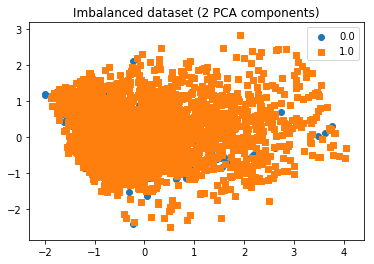

In [28]:
pca = PCA(n_components=2)
X = pca.fit_transform(X_full)
plot_2d_space(X, Y_full, 'Imbalanced dataset (2 PCA components)')

Random Oversampling

In [29]:
print('Train data',X_train.shape,y_train.shape)
print('Test data',X_test.shape,y_test.shape)

Train data (2824, 219) (2824,)
Test data (707, 219) (707,)


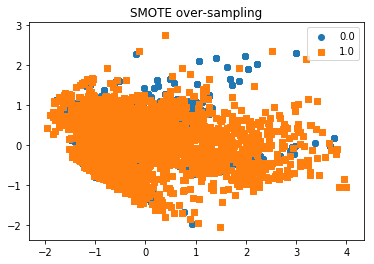

In [30]:
ros = RandomOverSampler(random_state=0)
X_train_rs, y_train_rs = ros.fit_sample(X_train, y_train)
#print(sorted(Counter(y_train_rs).items()))
X = pca.fit_transform(X_train_rs)
plot_2d_space(X, y_train_rs, 'SMOTE over-sampling')

In [31]:
 X_test_rs, y_test_rs = X_test,y_test

In [32]:
len(X_train_rs)
len(y_train_rs)

4870

Random Forest with Random Sampling and all the features

In [33]:
## Search grid for optimal parameters
rf_param_grid_rs = {"max_depth": [None],
              "max_features": [20,50],
              "bootstrap": [True],
              "n_estimators" :[300,500,1000],
              "criterion": ["entropy"],
            "class_weight":[{0:0.93,1:0.06}]}
gsRFC_rs = GridSearchCV(RFC,param_grid = rf_param_grid_rs, cv=kfold, scoring='average_precision', n_jobs= 16, verbose = 1)

In [34]:
gsRFC_rs.fit(X_train_rs,y_train_rs)
RFC_best_rs = gsRFC_rs.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:  6.7min remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:  6.7min finished


In [35]:
predict_and_print_scores(RFC_best_rs,X_train_rs,X_test_rs,y_train_rs,y_test_rs)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.93, 1: 0.06},
            criterion='entropy', max_depth=None, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)
614 63 23 7
Total test cost 164500
score 0.9575671852899575
2435 2435 0 0
Total train cost 0


In [131]:
gb_param_grid_rs= {'loss' : ["deviance"],
              'n_estimators' : [100,800,1000],
              'learning_rate': [0.1, 0.01]
              }

gsGBC_rs = GridSearchCV(GBC,param_grid = gb_param_grid_rs, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsGBC_rs.fit(X_train_rs,y_train_rs)
GBC_best_rs = gsGBC_rs.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:  4.2min finished


In [132]:
predict_and_print_scores(GBC_best_rs,X_train_rs,X_test_rs,y_train_rs,y_test_rs)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
617 77 9 4
Total test cost 65000
score 0.9816124469589816
2435 2435 0 0
Total train cost 0


fp_ = np.logical_and(np.logical_xor(y_test_rs,res),res)
fn_ = np.logical_and(np.logical_xor(y_test_rs,res),np.logical_not(res))
print('False positives:', np.where(fp_==True ) )
print('False Negatives:', np.where(fn_==True ) )


Selecting important features using the fearture importance obtained from Random Forest

In [36]:
feature = SelectFromModel(RFC_best_rs,prefit=True)
X_train_transformed_rs = feature.transform(X_train_rs)
X_test_transformed_rs = feature.transform(X_test_rs)

#Random Forest on important features to check if it is similar to the Random forest on full features

In [37]:
rf_param_grid_rs_trans = {"max_depth": [None],
              "max_features": [5,10,30,50,66],
              "bootstrap": [True],
              "n_estimators" :[20,50,100,500],
              "criterion": ["entropy"],
            "class_weight":[{0:0.93,1:0.06}]}
gsRFC_rs_trans = GridSearchCV(RFC,param_grid = rf_param_grid_rs_trans, cv=kfold, scoring='accuracy', n_jobs= 16, verbose = 1)

In [38]:
print(X_train_transformed_rs.shape)
print(X_test_transformed_rs.shape)
gsRFC_rs_trans.fit(X_train_transformed_rs,y_train_rs)
RFC_best_rs_trans = gsRFC_rs_trans.best_estimator_


(4870, 73)
(707, 73)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  5.3min finished


In [39]:
predict_and_print_scores(RFC_best_rs_trans,X_train_transformed_rs,X_test_transformed_rs,y_train_rs,y_test_rs)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.93, 1: 0.06},
            criterion='entropy', max_depth=None, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)
612 61 25 9
Total test cost 179500
score 0.9519094766619519
2435 2435 0 0
Total train cost 0


SVM on full features with random oversampling

In [40]:
svc_param_grid_rs = {'kernel': ['rbf'], 
                  'gamma': [1],
                 'C': [5],
                 'class_weight' : [{0: 15, 1: 1.07}]}
gsSVMC_rs = GridSearchCV(SVMC,param_grid = svc_param_grid_rs, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsSVMC_rs.fit(X_train_rs,y_train_rs)
SVMC_best_rs = gsSVMC_rs.best_estimator_
# Best score
gsSVMC_rs.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:   14.3s finished


0.9449691991786447

In [41]:
predict_and_print_scores(SVMC_best_rs,X_train,X_test,y_train,y_test)

SVC(C=5, cache_size=200, class_weight={0: 15, 1: 1.07}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
578 64 22 43
Total test cost 175500
score 0.9080622347949081
2307 389 0 128
Total train cost 64000


SVM on sub-set of features and Random oversampling

In [42]:
svc_param_grid_rs = {'kernel': ['rbf'], 
                  'gamma': [1],
                  'C': [10],
                 'class_weight' : [{0: 0.93, 1: 0.06}]}
gsSVMC_rs_trans = GridSearchCV(SVMC,param_grid = svc_param_grid_rs, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsSVMC_rs_trans.fit(X_train_transformed_rs,y_train_rs)
SVMC_best_rs_trans = gsSVMC_rs_trans.best_estimator_
# Best score
gsSVMC_rs_trans.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    8.0s finished


0.8147843942505133

In [43]:
predict_and_print_scores(SVMC_best_rs_trans,X_train_transformed_rs,X_test_transformed_rs,y_train_rs,y_test_rs)

SVC(C=10, cache_size=200, class_weight={0: 0.93, 1: 0.06}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
430 84 2 191
Total test cost 109500
score 0.727015558698727
1572 2435 0 863
Total train cost 431500


In [44]:
from sklearn.svm import LinearSVC
clf_rs_trans = LinearSVC(random_state=0, tol=1e-5,class_weight={0: 0.8, 1: 0.2},penalty='l2')
clf_rs_trans.fit(X_train_transformed_rs,y_train_rs)

LinearSVC(C=1.0, class_weight={0: 0.8, 1: 0.2}, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [45]:
predict_and_print_scores(clf_rs_trans,X_train_transformed_rs,X_test_transformed_rs,y_train_rs,y_test_rs)

LinearSVC(C=1.0, class_weight={0: 0.8, 1: 0.2}, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
280 85 1 341
Total test cost 177500
score 0.5162659123055162
1002 2435 0 1433
Total train cost 716500


In [46]:
clf_rs = LinearSVC(C=1,random_state=0, tol=1e-5,class_weight={0: 0.93, 1: 0.06},penalty='l2')
clf_rs.fit(X_train_rs,y_train_rs)

LinearSVC(C=1, class_weight={0: 0.93, 1: 0.06}, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [47]:
predict_and_print_scores(clf_rs,X_train_rs,X_test_rs,y_train_rs,y_test_rs)

LinearSVC(C=1, class_weight={0: 0.93, 1: 0.06}, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
247 86 0 374
Total test cost 187000
score 0.471004243281471
883 2435 0 1552
Total train cost 776000


SMOTE oversampling

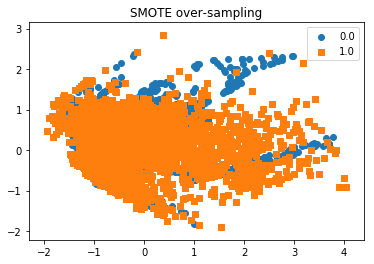

In [48]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
X = pca.fit_transform(X_sm)
plot_2d_space(X, y_sm, 'SMOTE over-sampling')

In [49]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = X_sm, X_test , y_sm , y_test

In [50]:
svc_param_grid_sm = {'kernel': ['rbf'], 
                  'gamma': [0.1,1,10],
                 'C': [1,10,100],
                 'class_weight' : [{0: 15, 1: 1.07}]}
gsSVMC_sm = GridSearchCV(SVMC,param_grid = svc_param_grid_sm, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsSVMC_sm.fit(X_train_sm,y_train_sm)
SVMC_best_sm = gsSVMC_sm.best_estimator_

# Best score
gsSVMC_sm.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=16)]: Done  45 out of  45 | elapsed:  4.2min finished


0.9837782340862423

In [51]:
predict_and_print_scores(SVMC_best_sm,X_train_sm,X_test_sm,y_train_sm,y_test_sm)

SVC(C=10, cache_size=200, class_weight={0: 15, 1: 1.07}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
617 33 53 4
Total test cost 373000
score 0.9193776520509194
2435 2435 0 0
Total train cost 0


RandomForest + SMOTE

In [52]:
rf_param_grid_sm = {"max_depth": [None],
              "max_features": [50,100],
              "bootstrap": [True],
              "n_estimators" :[25,50,100,500],
              "criterion": ["entropy"],
            "class_weight":[{0:0.93,1:0.06}]}
gsRFC_sm = GridSearchCV(RFC,param_grid = rf_param_grid_sm, cv=kfold, scoring='accuracy', n_jobs= 16, verbose = 1)

In [53]:
gsRFC_sm.fit(X_train_sm,y_train_sm)
RFC_best_sm = gsRFC_sm.best_estimator_
# Best score
gsRFC_sm.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:  9.0min finished


0.9743326488706365

In [54]:
predict_and_print_scores(RFC_best_sm,X_train_sm,X_test_sm,y_train_sm,y_test_sm)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.93, 1: 0.06},
            criterion='entropy', max_depth=None, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)
612 66 20 9
Total test cost 144500
score 0.958981612446959
2435 2435 0 0
Total train cost 0


ExtraRandomTrees + SMOTE

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(random_state=42)
extra_trees_param_grid_sm = {"max_depth": [None],
              "max_features": [50,100],
              "bootstrap": [True],
              "n_estimators" :[500,1000],
              "min_samples_split":[2,10,20],
              "criterion": ["entropy"],
            "class_weight":[{0:15,1:1.071}]}
extc_sm = GridSearchCV(ETC,param_grid = extra_trees_param_grid_sm, cv=kfold, scoring='accuracy', n_jobs= 16, verbose = 1)

In [56]:
extc_sm.fit(X_train_sm,y_train_sm)
extc_best_sm = extc_sm.best_estimator_
# Best score
extc_sm.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   45.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  3.2min finished


0.9731006160164271

In [57]:
predict_and_print_scores(extc_best_sm,X_train_sm,X_test_sm,y_train_sm,y_test_sm)

ExtraTreesClassifier(bootstrap=True, class_weight={0: 15, 1: 1.071},
           criterion='entropy', max_depth=None, max_features=100,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
608 69 17 13
Total test cost 125500
score 0.9575671852899575
2435 2435 0 0
Total train cost 0


In [ ]:
SMOTE + GradientBoosting

In [128]:
gb_param_grid_sm= {'loss' : ["deviance"],
              'n_estimators' : [800,1000],
              'learning_rate': [0.1, 0.01]
              }

gsGBC_sm = GridSearchCV(GBC,param_grid = gb_param_grid_sm, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsGBC_sm.fit(X_train_sm,y_train_sm)
GBC_best_sm= gsGBC_sm.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:  3.0min remaining:  3.0min
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:  4.7min finished


In [130]:
predict_and_print_scores(GBC_best_sm,X_train_sm,X_test,y_train_sm,y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
610 73 13 11
Total test cost 96500
score 0.9660537482319661
2435 2435 0 0
Total train cost 0


In [209]:
def ensemble_predict(estimator_list,weights_list,X_test_list,y_test_list,threshold=0.5,eval=True):
    sum_of_predictions = np.zeros(len(X_test_list[0]))
    for (estimator,weight,X_test) in zip(estimator_list,weights_list,X_test_list):
        res=estimator.predict(X_test)
        sum_of_predictions = sum_of_predictions + weight*res
    final_predictions = (sum_of_predictions/sum(weights_list))>threshold
    if eval==False:
        return final_predictions
    number_of_correct_predictions = (final_predictions==y_test).sum()
    tn, fp, fn, tp = confusion_matrix(y_test,1*final_predictions).ravel()
    print(tp,tn,fp,fn)
    print("Number of correct predictions",number_of_correct_predictions)
    cost = 7000*fp+500*fn
    print("Cost on predictions",cost)
    return cost

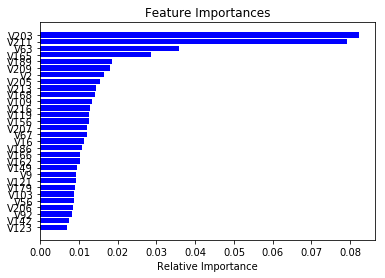

In [61]:
importances = RFC_best.feature_importances_
indices = np.argsort(importances)[-30:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), ["V"+str(i) for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
feature = SelectFromModel(RFC_best_sm,prefit=True)
X_train_transformed = feature.transform(X_train_sm)

In [63]:
print(X_train_transformed.shape)

(4870, 61)


In [64]:
X_test_transformed = feature.transform(X_test_sm)


In [65]:
print(X_test_transformed.shape)

(707, 61)


Try all algos on oversampled data with all the features

In [66]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_rs, y = y_train_rs, scoring = "average_precision", cv = kfold, n_jobs=4))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [67]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})
print(cv_res)

   CrossValMeans  CrossValerrors                   Algorithm
0       0.783949        0.015668                         SVC
1       0.967351        0.003753                DecisionTree
2       0.966940        0.001991                    AdaBoost
3       0.999160        0.000805                RandomForest
4       0.999778        0.000404                  ExtraTrees
5       0.995225        0.000875            GradientBoosting
6       0.926222        0.007611     MultipleLayerPerceptron
7       0.944437        0.006524                 KNeighboors
8       0.902160        0.010083          LogisticRegression
9       0.929099        0.010423  LinearDiscriminantAnalysis


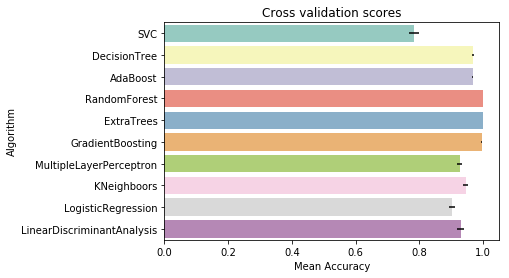

In [68]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [69]:
svc_param_grid_rs_trans = {'kernel': ['rbf'], 
                  'gamma': [1],
                  'C': [10],
                 'class_weight' : [{0: 0.6, 1: 0.4},{0: 0.5, 1: 0.5},{0: 0.8, 1: 0.2}]}
gsSVMC_rs_trans = GridSearchCV(SVMC,param_grid = svc_param_grid_rs_trans, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsSVMC_rs_trans.fit(X_train_transformed,y_train_sm)
SVMC_best_rs_trans = gsSVMC_rs_trans.best_estimator_
# Best score
gsSVMC.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=16)]: Done  15 out of  15 | elapsed:   12.6s finished


-157502.12464589236

In [70]:
predict_and_print_scores(SVMC_best_rs_trans,X_train_transformed,X_test_transformed,y_train_sm,y_test_sm)

SVC(C=10, cache_size=200, class_weight={0: 0.5, 1: 0.5}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
546 73 13 75
Total test cost 128500
score 0.8755304101838756
2111 2406 29 324
Total train cost 365000


In [71]:
gb_param_grid_sm_transform = {'loss' : ["deviance"],
              'n_estimators' : [800,1000],
              'learning_rate': [0.1, 0.01]
              }

gsGBC_sm_transform = GridSearchCV(GBC,param_grid = gb_param_grid_sm_transform, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsGBC_sm_transform.fit(X_train_transformed,y_train_sm)
GBC_best_sm_transform = gsGBC_sm_transform.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:   44.7s remaining:   44.7s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:  1.2min finished


In [72]:
# Best score
predict_and_print_scores(GBC_best_sm_transform,X_train_transformed,X_test_transformed,y_train_sm,y_test_sm)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
607 76 10 14
Total test cost 77000
score 0.9660537482319661
2435 2435 0 0
Total train cost 0


Minimum cost giving ensemble

In [163]:
ensemble_predict([extc_best_sm,RFC_best_sm,GBC_best_sm_transform,GBC_best_sm],[1.5,1.0,2.5,1.5],[X_test_sm,X_test_sm,X_test_transformed,X_test_sm],[y_test_sm,y_test_sm,y_test_sm,y_test_sm],0.93)

596 81 5 25
Number of correct predictions 677
Cost on predictions 47500


47500

In [174]:
weights_list = [1,2,3]
threshold_list = [0.5,0.6,0.93,0.8]
min_cost = 999999
weights_permutations_list = list(itertools.product([1,2,3], repeat=4))
print(weights_permutations_list)
for weight_perm in weights_permutations_list:
    for threshold in threshold_list:
        current_cost=ensemble_predict([GBC_best_rs,GBC_best_rc_rs,GBC_best,extc_best_sm],list(weight_perm),[X_test,X_test_rc,X_test,X_test],[y_test,y_test,y_test,y_test,y_test],threshold)
        if current_cost<min_cost:
            min_cost = current_cost
            final_weights,final_threshold = weight_perm,threshold

[(1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 1, 3), (1, 1, 2, 1), (1, 1, 2, 2), (1, 1, 2, 3), (1, 1, 3, 1), (1, 1, 3, 2), (1, 1, 3, 3), (1, 2, 1, 1), (1, 2, 1, 2), (1, 2, 1, 3), (1, 2, 2, 1), (1, 2, 2, 2), (1, 2, 2, 3), (1, 2, 3, 1), (1, 2, 3, 2), (1, 2, 3, 3), (1, 3, 1, 1), (1, 3, 1, 2), (1, 3, 1, 3), (1, 3, 2, 1), (1, 3, 2, 2), (1, 3, 2, 3), (1, 3, 3, 1), (1, 3, 3, 2), (1, 3, 3, 3), (2, 1, 1, 1), (2, 1, 1, 2), (2, 1, 1, 3), (2, 1, 2, 1), (2, 1, 2, 2), (2, 1, 2, 3), (2, 1, 3, 1), (2, 1, 3, 2), (2, 1, 3, 3), (2, 2, 1, 1), (2, 2, 1, 2), (2, 2, 1, 3), (2, 2, 2, 1), (2, 2, 2, 2), (2, 2, 2, 3), (2, 2, 3, 1), (2, 2, 3, 2), (2, 2, 3, 3), (2, 3, 1, 1), (2, 3, 1, 2), (2, 3, 1, 3), (2, 3, 2, 1), (2, 3, 2, 2), (2, 3, 2, 3), (2, 3, 3, 1), (2, 3, 3, 2), (2, 3, 3, 3), (3, 1, 1, 1), (3, 1, 1, 2), (3, 1, 1, 3), (3, 1, 2, 1), (3, 1, 2, 2), (3, 1, 2, 3), (3, 1, 3, 1), (3, 1, 3, 2), (3, 1, 3, 3), (3, 2, 1, 1), (3, 2, 1, 2), (3, 2, 1, 3), (3, 2, 2, 1), (3, 2, 2, 2), (3, 2, 2, 3), (3, 2, 3, 1), (3, 2, 3, 2), (3, 2

616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
618 76 10 3
Number of correct predictions 694
Cost on predictions 71500
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
618 76 10 3
Number of correct predictions 694
Cost on predictions 71500
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
617 77 9 4
Number of correct predictions 694
Cost on predictions 65000
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
616 77 9 5
Number of correct predictions 693
Cost on predictions 6550

604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
617 77 9 4
Number of correct predictions 694
Cost on predictions 65000
617 77 9 4
Number of correct predictions 694
Cost on predictions 65000
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
617 77 9 4
Number of correct predictions 694
Cost on predictions 65000
616 77 9 5
Number of correct predictions 693
Cost on predictions 65500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
616 77 9 5
Number of correct predictions 693
Cost on predictions 65500
616 77 9 5
Number of correct predictions 693
Cost on predictions 65500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500
604 81 5 17
Number of correct predictions 685
Cost on predictions 43500

In [175]:
print(min_cost,final_weights,final_threshold)

43500 (1, 1, 1, 1) 0.93


In [243]:
ensemble_predict([GBC_best_rs,GBC_best_rc_rs,GBC_best,extc_best_sm],list(final_weights),[X_test,X_test_rc,X_test,X_test],[y_test,y_test,y_test,y_test,y_test],final_threshold)

604 81 5 17
Number of correct predictions 685
Cost on predictions 43500


43500

In [273]:
r_predicted_df =pd.read_csv('/home/sneha/personal_stuff/ravi_zapr_submission/Submission.csv')
r_predictions = r_predicted_df["Machine_State"]

In [274]:
r_predictions.sum()

329

In [363]:
test_df = pd.read_csv("/home/sneha/personal_stuff/rs/Research Scientist/TestingSet.csv")

In [364]:
test_df_without_sn = test_df.drop(['Sl No.'], axis=1).reset_index(drop=True)

In [365]:
nan_columns = list(get_nan_indexes(test_df_without_sn))
nan_columns

number of columns with missing values : 31


[226, 271, 368, 213, 349]

In [366]:
for i in range(0,219):
    test_df_without_sn[test_df_without_sn.columns[i]].fillna((test_df_without_sn[test_df_without_sn.columns[i]].mean()),inplace=True)

In [367]:
#normalize_columns(test_df_without_sn)
df = test_df_without_sn
#df = train_df
for column in df:
    if df[column].max()!=df[column].min():
        df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())
    else :
        print(column)

V87
V199


In [368]:
test_df_without_sn = df

In [369]:
nan_columns = list(get_nan_indexes(df))
nan_columns

number of columns with missing values : 0


[]

In [318]:
#test_df_without_sn = test_df_without_sn.drop(['V199'], axis=1).reset_index(drop=True)

In [370]:
test_df_rc = test_df_without_sn.drop(to_drop, axis=1).reset_index(drop=True)

In [371]:
test_df_without_sn.shape,test_df_rc.shape

((400, 219), (400, 104))

Predictions on final test using ensemble

In [372]:
final_y = ensemble_predict([GBC_best_rs,GBC_best_rc_rs,GBC_best,extc_best_sm],list(final_weights),[test_df_without_sn,test_df_rc,test_df_without_sn,test_df_without_sn],[y_test,y_test,y_test,y_test,y_test],final_threshold,False)

In [376]:
final_y.sum(), r_predictions.sum()

(381, 329)

In [374]:
#print(final_y==r_predictions)
tn, fp, fn, tp = confusion_matrix(r_predictions,final_y).ravel()
print(tp,tn,fp,fn)
total_cost = fp*7000 + fn*500

316 6 65 13


In [251]:
weights_list = [1,2,3]
threshold_list = [0.5,0.6,0.93,0.8]
min_cost1 = 999999
weights_permutations_list = list(itertools.product([1,2,3], repeat=3))
print(weights_permutations_list)
for weight_perm in weights_permutations_list:
    for threshold in threshold_list:
        current_cost=ensemble_predict([GBC_best_rs,GBC_best_rc_rs,GBC_best],list(weight_perm),[X_test,X_test_rc,X_test],[y_test,y_test,y_test,y_test],threshold)
        if current_cost<min_cost1:
            min_cost1 = current_cost
            final_weights1,final_threshold1 = weight_perm,threshold

[(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 1), (3, 3, 2), (3, 3, 3)]
617 78 8 4
Number of correct predictions 695
Cost on predictions 58000
617 78 8 4
Number of correct predictions 695
Cost on predictions 58000
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
617 78 8 4
Number of correct predictions 695
Cost on predictions 58000
617 78 8 4
Number of correct predictions 695
Cost on predictions 58000
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
616 78 8 5
Number of correct predictions 694
Cost on predictions 58500
619 70 16 2
Number of correct predictions 689
Cost on predictions 113000
617 78 8 4
Number of correct predictions 695
Cost on predicti

In [252]:
print(min_cost1,final_weights1,final_threshold1)

58000 (1, 1, 1) 0.5


In [253]:
ensemble_predict([GBC_best_rs,GBC_best_rc_rs,GBC_best],list(final_weights1),[X_test,X_test_rc,X_test],[y_test,y_test,y_test,y_test],final_threshold1)

617 78 8 4
Number of correct predictions 695
Cost on predictions 58000


58000

In [354]:
y_ens1=ensemble_predict([GBC_best_rs,GBC_best_rc_rs,GBC_best],list(final_weights1),[test_df_without_sn,test_df_rc,test_df_without_sn],[y_test,y_test,y_test,y_test],final_threshold1,False)

In [355]:
y_gb = ensemble_predict([GBC_best_rc_rs],[1],[test_df_rc],[y_test],0.5,False)

In [356]:
tn, fp, fn, tp = confusion_matrix(r_predictions,y_ens1).ravel()
print(tp,tn,fp,fn)
tn, fp, fn, tp = confusion_matrix(r_predictions,final_y).ravel()
print(tp,tn,fp,fn)
tn, fp, fn, tp = confusion_matrix(r_predictions,y_gb).ravel()
print(tp,tn,fp,fn)

329 0 71 0
316 6 65 13
329 0 71 0


In [357]:
r_predictions.sum(),y_gb.sum()

(329, 400)

In [362]:
predict_and_print_scores(GBC_best_rc_rs,X_train_rc_rs,test_df_rc,y_train_rs,r_predictions)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
329 0 71 0
Total test cost 497000
score 0.8225
2435 2435 0 0
Total train cost 0


Dimensionality Reduction

In [74]:
clf_l1 = LinearSVC(penalty='l1',loss='l2',dual=False,class_weight={0:15,1:1.07})
clf_l1.fit(X_train_sm,y_train_sm)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/svm/classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


LinearSVC(C=1.0, class_weight={0: 15, 1: 1.07}, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l1', random_state=None,
     tol=0.0001, verbose=0)

In [75]:
predict_and_print_scores(clf_l1,X_train_sm,X_test_sm,y_train_sm,y_test_sm)

LinearSVC(C=1.0, class_weight={0: 15, 1: 1.07}, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l1', random_state=None,
     tol=0.0001, verbose=0)
361 85 1 260
Total test cost 137000
score 0.6308345120226309
1322 2435 0 1113
Total train cost 556500


In [76]:
X_train_rs_fa = FactorAnalysis(n_components = 80).fit_transform(X_train_rs)
X_test_rs_fa = FactorAnalysis(n_components = 80).fit_transform(X_test_rs)

In [77]:
X_train_sm_fa = FactorAnalysis(n_components = 80).fit_transform(X_train_sm)
X_test_sm_fa = FactorAnalysis(n_components = 80).fit_transform(X_test_sm)

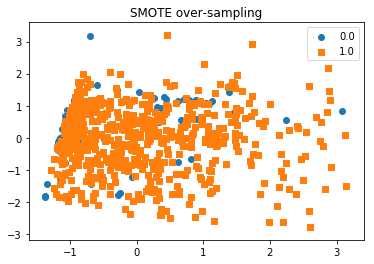

In [78]:
plot_2d_space(X_test_rs_fa, y_test_rs, 'SMOTE over-sampling')

In [79]:
rf_param_grid_rs_fa = {"max_depth": [None],
              "max_features": [5,10,50],
              "bootstrap": [True],
              "n_estimators" :[500],
              "criterion": ["entropy"],
            "class_weight":[{0:0.93,1:0.06}]}
gsRFC_rs_fa = GridSearchCV(RFC,param_grid = rf_param_grid_rs_fa, cv=kfold, scoring='accuracy', n_jobs= 16, verbose = 1)

In [80]:
gsRFC_rs_fa.fit(X_train_rs_fa,y_train_rs)
RFC_best_rs_fa = gsRFC_rs_fa.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=16)]: Done  15 out of  15 | elapsed:  4.2min finished


In [81]:
predict_and_print_scores(RFC_best_rs_fa,X_train_rs_fa,X_test_rs_fa,y_train_rs,y_test_rs)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.93, 1: 0.06},
            criterion='entropy', max_depth=None, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)
619 2 84 2
Total test cost 589000
score 0.8783592644978784
2435 2435 0 0
Total train cost 0


In [82]:
svc_param_grid_rs_fa = {'kernel': ['rbf'], 
                  'gamma': [0.1,1,10],
                  'C': [0.1,1,10],
                 'class_weight' : [{0: 0.96, 1: 0.03}]}
gsSVMC_rs_fa = GridSearchCV(SVMC,param_grid = svc_param_grid_rs_fa, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsSVMC_rs_fa.fit(X_train_rs_fa,y_train_rs)
SVMC_best_rs_fa = gsSVMC_rs_fa.best_estimator_
# Best score
gsSVMC_rs_fa.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=16)]: Done  45 out of  45 | elapsed:  1.8min finished


0.999794661190965

In [83]:
predict_and_print_scores(SVMC_best_rs_fa,X_train_rs_fa,X_test_rs_fa,y_train_rs,y_test_rs)

SVC(C=10, cache_size=200, class_weight={0: 0.96, 1: 0.03}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
621 0 86 0
Total test cost 602000
score 0.8783592644978784
2435 2435 0 0
Total train cost 0


In [84]:
gb_param_grid_sm_fa = {'loss' : ["deviance"],
              'n_estimators' : [800,1000],
              'learning_rate': [0.1, 0.01]
              }

gsGBC_sm_fa = GridSearchCV(GBC,param_grid = gb_param_grid_sm_fa, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsGBC_sm_fa.fit(X_train_sm_fa,y_train_sm)
GBC_best_sm_fa = gsGBC_sm_fa.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:  2.1min finished


In [85]:
predict_and_print_scores(GBC_best_sm_fa,X_train_sm_fa,X_test_sm_fa,y_train_sm,y_test_sm)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
438 36 50 183
Total test cost 441500
score 0.6704384724186704
2435 2435 0 0
Total train cost 0


##PCA

In [86]:
pca = PCA(n_components = 0.9)
X_train_sm_pca = pca.fit_transform(X_train_rs)
print(pca.n_components_)

8


In [87]:
X_test_sm_pca = PCA(pca.n_components_).fit_transform(X_test_sm)
X_test_sm_pca.shape,X_train_sm_pca.shape

((707, 8), (4870, 8))

In [88]:
gb_param_grid_sm_pca = {'loss' : ["deviance"],
              'n_estimators' : [800,1000],
              'learning_rate': [0.1, 0.01]
              }

gsGBC_sm_pca = GridSearchCV(GBC,param_grid = gb_param_grid_sm_pca, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsGBC_sm_pca.fit(X_train_sm_pca,y_train_sm)
GBC_best_sm_pca = gsGBC_sm_pca.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:   14.4s finished


In [89]:
predict_and_print_scores(GBC_best_sm_pca,X_train_sm_pca,X_test_sm_pca,y_train_sm,y_test_sm)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
577 7 79 44
Total test cost 575000
score 0.826025459688826
2435 2435 0 0
Total train cost 0


Finding Correlated Features

In [90]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
X_train_remove_correlated = X_train.drop(to_drop, axis=1).reset_index(drop=True)

115


In [91]:
X_test_rc = X_test.drop(to_drop, axis=1).reset_index(drop=True)

In [114]:
X_train_remove_correlated.shape

(2824, 104)

In [118]:
X_train.shape,y_train.shape

((2824, 219), (2824,))

In [93]:
ros = RandomOverSampler(random_state=0)
X_train_rc_rs, y_train_rc_rs = ros.fit_sample(X_train_remove_correlated, y_train)
#print(sorted(Counter(y_train_rs).items()))
#X = pca.fit_transform(X_train_rc_rs)
#plot_2d_space(X, y_train_rc_rs, 'SMOTE over-sampling')
X_train_rc_rs.shape,y_train_rc_rs.sum()

((4870, 104), 2435.0)

In [94]:
svc_param_grid_rc_rs= {'kernel': ['rbf'], 
                  'gamma': [0.1,1,10],
                  'C': [0.1,1,10],
                 'class_weight' : [{0: 0.96, 1: 0.03}]}
gsSVMC_rc_rs = GridSearchCV(SVMC,param_grid = svc_param_grid_rc_rs, cv=kfold, scoring="precision", n_jobs= 16, verbose = 1)
gsSVMC_rc_rs.fit(X_train_rc_rs,y_train_rc_rs)
SVMC_best_rc_rs = gsSVMC_rc_rs.best_estimator_
# Best score
#SVMC_best_rc_rs.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/s

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/s

In [95]:
predict_and_print_scores(SVMC_best_rc_rs,X_train_rc_rs,X_test_rc,y_train_rc_rs,y_test)

SVC(C=1, cache_size=200, class_weight={0: 0.96, 1: 0.03}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
204 86 0 417
Total test cost 208500
score 0.4101838755304102
680 2435 0 1755
Total train cost 877500


In [119]:
gb_param_grid_rc_rs = {'loss' : ["deviance"],
              'n_estimators' : [800,1000],
              'learning_rate': [0.1, 0.01]
              }

gsGBC_sm_rc_rs = GridSearchCV(GBC,param_grid = gb_param_grid_rc_rs, cv=kfold, scoring="accuracy", n_jobs= 16, verbose = 1)
gsGBC_sm_rc_rs.fit(X_train_rc_rs,y_train_rc_rs)
GBC_best_rc_rs = gsGBC_sm_rc_rs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:   58.5s remaining:   58.5s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:  1.6min finished


In [120]:
predict_and_print_scores(GBC_best_rc_rs,X_train_rc_rs,X_test_rc,y_train_rc_rs,y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
616 78 8 5
Total test cost 58500
score 0.9816124469589816
2435 2435 0 0
Total train cost 0


#DNN

In [96]:
type(X_train_sm), y_train_sm.sum()

(numpy.ndarray, 2435.0)

In [97]:
def generate_train_input_fn(features,labels, batch_size,num_epochs):
    def _parse_and_preprocess(features,labels):
        features = tf.cast(features,tf.float32)
        labels = tf.cast(labels,tf.int32)
        return(features,labels)
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    dataset = dataset.map(lambda x,y:_parse_and_preprocess(x,y)).shuffle(buffer_size=2000).repeat(num_epochs).batch(batch_size)
    dataset_iterator = dataset.make_one_shot_iterator()   
    return dataset_iterator.get_next()
 

In [98]:
def generate_test_input_fn(features, batch_size,num_epochs):
    def _parse_and_preprocess(features):
        features = tf.cast(features,tf.float32)
        return(features)
    dataset = tf.data.Dataset.from_tensor_slices(features)
    dataset = dataset.map(lambda x:_parse_and_preprocess(x)).batch(batch_size)
    dataset_iterator = dataset.make_one_shot_iterator()   
    return dataset_iterator.get_next()

In [99]:
def machine_model_fn(features, labels, mode, params):
    """Model function for Dnn."""
    dense1 = tf.layers.dense(inputs=features, units=params['model_size'][0], activation=tf.nn.relu)
    dense2 = tf.layers.dense(inputs=dense1, units=params['model_size'][1], activation=tf.nn.relu)
    dropout = tf.layers.dropout(inputs=dense2, rate=0.3, training=mode == tf.estimator.ModeKeys.TRAIN)
    dense3 = tf.layers.dense(inputs=dropout, units=params['model_size'][2], activation=tf.nn.relu)
    dropout2 = tf.layers.dropout(inputs=dense3, rate=0.2, training=mode == tf.estimator.ModeKeys.TRAIN)
    # Logits Layer
    logits = tf.layers.dense(inputs=dropout2, units=params['model_size'][3])
    
    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.sigmoid(logits),
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    print('labels',labels)
    labels_expdims = tf.expand_dims(labels,[-1])
    one_hot_labels = tf.one_hot(labels, 2) 
    # Calculate Loss (for both TRAIN and EVAL modes)
    predicted_label = tf.argmax(input=logits, axis=1)
    labels_cast = tf.cast(labels,tf.float32)
    loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(targets=one_hot_labels, logits=logits,pos_weight=params['weight']))
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    # Add evaluation metrics (for EVAL mode)
    eval_predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.sigmoid(logits),
      "actual_labels" : labels
        
    }
    eval_metric_ops = {"accuracy": tf.metrics.accuracy(labels=labels_expdims, predictions=predictions["classes"]),"precision": tf.metrics.precision(labels=labels_expdims, predictions=predictions["classes"]),
                      "recall": tf.metrics.recall(labels=labels_expdims, predictions=predictions["classes"])}
                       #"confusion_matrix":tf.contrib.metrics.confusion_matrix(labels=labels, predictions=predictions["classes"])}
    eval_metric_precision = {"precision": tf.metrics.precision(labels=labels_expdims, predictions=predictions["classes"])}
    tf.summary.scalar('accuracy', eval_metric_ops['accuracy'])
    tf.summary.scalar('precision', eval_metric_precision['precision'])
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [100]:
def build_model(model_dir,hyper_parm_dict):
    runconfig = tf.estimator.RunConfig(save_checkpoints_steps = 500)
    machine_classifier = tf.estimator.Estimator(model_fn=machine_model_fn, model_dir=model_dir,params=hyper_parm_dict)
    return machine_classifier

In [101]:
def build_estimator(model_type='DEEP', model_dir=None,hyper_parm_dict=None):
    if model_dir is None:
        model_dir = 'models/model_' + model_type + '_' + str(int(time.time()))
        print("Model directory = %s" % model_dir)
    m = build_model(model_dir,hyper_parm_dict)
    print('estimator built')
    return m

In [102]:
def train_dnn_classifier(X_train,y_train,hyper_parm_dict):
    print("Begin training and evaluation")
    no_of_training_examples = len(X_train)
    #no_of_test_examples = len(X_test)
    no_of_epochs = 100
    batch_size = 16
    train_steps = math.ceil((float(no_of_training_examples)*no_of_epochs)/batch_size)
    #test_steps = math.ceil(float(no_of_test_examples)/batch_size)
    print("No of train steps",train_steps)
    #print("No of test steps",test_steps)
    model_type = 'DEEP'
    model_dir =  'model_' + model_type + '_' + str(int(time.time()))
    print("Saving model checkpoints to " + model_dir)
    export_dir = model_dir + '/exports'
    m = build_estimator(model_type, model_dir, hyper_parm_dict)
    m.train(input_fn=lambda:generate_train_input_fn(X_train,y_train,batch_size,no_of_epochs))
    print('Fit Done')
    return m  

In [103]:
def predict_and_get_scores_from_dnnclassifier(model,X,y):
        predicted_classes = []
        probabilities = []
        results = model.predict(input_fn=lambda:generate_test_input_fn(X,1,1))
        for i in enumerate(results):
                predicted_classes.append(i[1]['classes'])
                probabilities.append(i[1]['probabilities'])      
        #print('predicted_classes', predicted_classes)
        #print('probabilities ',probabilities)
        tn, fp, fn, tp = confusion_matrix(y,predicted_classes).ravel()
        print(tp,tn,fp,fn)
        total_cost = fp*7000 + fn*500
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        precision = tp/(tp+fp)
        #print('Total test cost', total_cost)
        #print('Precision',tp/(tp+fp))
        #print('Recall',tp/(tp+fn))
        #print('Accuracy',(tp+tn)/(tp+tn+fp+fn))
        scores_list = [total_cost,precision,accuracy*100,fp,fn]
        return scores_list

In [104]:
hyper_parm_dict = {}
results = []
#model_size_list = [[100,50,20,2],[50,50,25,2],[70,50,20,2],[65,35,30,2]]
#weights_list = [0.07,0.06,0.05,0.4,1.2]
model_size_list = [[100,50,20,2]]
weights_list = [0.07]
for model_size in model_size_list:
    for weight in weights_list:
        hyper_parm_dict['weight'] = weight
        hyper_parm_dict['model_size'] = model_size
        print(hyper_parm_dict)
        model=train_dnn_classifier(X_train_rs,y_train_rs,hyper_parm_dict)
        scores_list = predict_and_get_scores_from_dnnclassifier(model,X_train_rs,y_train_rs) + predict_and_get_scores_from_dnnclassifier(model,X_test_rs,y_test_rs)
        results.append([hyper_parm_dict['weight']]+[hyper_parm_dict['model_size']]+scores_list)


{'weight': 0.07, 'model_size': [100, 50, 20, 2]}
Begin training and evaluation
No of train steps 30438
Saving model checkpoints to model_DEEP_1553247176
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model_DEEP_1553247176', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8396ba4a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
estimator built
INFO:tensorflow:Calling model_fn.
labels Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
labels Tensor("IteratorGetNext

INFO:tensorflow:loss = 0.0936695, step = 6901 (0.160 sec)
INFO:tensorflow:global_step/sec: 509.122
INFO:tensorflow:loss = 0.07111393, step = 7001 (0.197 sec)
INFO:tensorflow:global_step/sec: 565.126
INFO:tensorflow:loss = 0.09421035, step = 7101 (0.177 sec)
INFO:tensorflow:global_step/sec: 597.393
INFO:tensorflow:loss = 0.13825274, step = 7201 (0.168 sec)
INFO:tensorflow:global_step/sec: 851.098
INFO:tensorflow:loss = 0.09384203, step = 7301 (0.117 sec)
INFO:tensorflow:global_step/sec: 428.486
INFO:tensorflow:loss = 0.066709414, step = 7401 (0.234 sec)
INFO:tensorflow:global_step/sec: 597.359
INFO:tensorflow:loss = 0.08444084, step = 7501 (0.167 sec)
INFO:tensorflow:global_step/sec: 861.2
INFO:tensorflow:loss = 0.09353952, step = 7601 (0.116 sec)
INFO:tensorflow:global_step/sec: 398.217
INFO:tensorflow:loss = 0.08994523, step = 7701 (0.251 sec)
INFO:tensorflow:global_step/sec: 581.804
INFO:tensorflow:loss = 0.06716692, step = 7801 (0.172 sec)
INFO:tensorflow:global_step/sec: 849.777
IN

INFO:tensorflow:global_step/sec: 573.079
INFO:tensorflow:loss = 0.13325693, step = 15101 (0.174 sec)
INFO:tensorflow:global_step/sec: 849.233
INFO:tensorflow:loss = 0.07192697, step = 15201 (0.118 sec)
INFO:tensorflow:global_step/sec: 407.681
INFO:tensorflow:loss = 0.11461706, step = 15301 (0.245 sec)
INFO:tensorflow:global_step/sec: 564.363
INFO:tensorflow:loss = 0.0461761, step = 15401 (0.177 sec)
INFO:tensorflow:global_step/sec: 850.749
INFO:tensorflow:loss = 0.088796765, step = 15501 (0.117 sec)
INFO:tensorflow:global_step/sec: 438.648
INFO:tensorflow:loss = 0.07182752, step = 15601 (0.228 sec)
INFO:tensorflow:global_step/sec: 558.799
INFO:tensorflow:loss = 0.063933484, step = 15701 (0.179 sec)
INFO:tensorflow:global_step/sec: 842.147
INFO:tensorflow:loss = 0.07481063, step = 15801 (0.119 sec)
INFO:tensorflow:global_step/sec: 448.55
INFO:tensorflow:loss = 0.04785598, step = 15901 (0.223 sec)
INFO:tensorflow:global_step/sec: 565.967
INFO:tensorflow:loss = 0.07547581, step = 16001 (0

INFO:tensorflow:loss = 0.058252104, step = 23201 (0.222 sec)
INFO:tensorflow:global_step/sec: 563.614
INFO:tensorflow:loss = 0.07047247, step = 23301 (0.177 sec)
INFO:tensorflow:global_step/sec: 817.692
INFO:tensorflow:loss = 0.10409254, step = 23401 (0.122 sec)
INFO:tensorflow:global_step/sec: 466.977
INFO:tensorflow:loss = 0.07254512, step = 23501 (0.214 sec)
INFO:tensorflow:global_step/sec: 570.418
INFO:tensorflow:loss = 0.07530322, step = 23601 (0.175 sec)
INFO:tensorflow:global_step/sec: 796.33
INFO:tensorflow:loss = 0.03836935, step = 23701 (0.126 sec)
INFO:tensorflow:global_step/sec: 454.993
INFO:tensorflow:loss = 0.08826172, step = 23801 (0.220 sec)
INFO:tensorflow:global_step/sec: 562.722
INFO:tensorflow:loss = 0.0907601, step = 23901 (0.178 sec)
INFO:tensorflow:global_step/sec: 768.875
INFO:tensorflow:loss = 0.07015555, step = 24001 (0.130 sec)
INFO:tensorflow:global_step/sec: 430.72
INFO:tensorflow:loss = 0.05369335, step = 24101 (0.232 sec)
INFO:tensorflow:global_step/sec: 

In [105]:
hyper_parm_dict = {}
results1 = []
model_size_list = [[100,50,20,2],[50,50,25,2],[70,50,20,2],[65,35,30,2]]
weights_list = [0.07,0.06,0.05,0.4,1.2]
#model_size_list = [[100,50,20,2]]
#weights_list = [0.07,0.06]
for model_size in model_size_list:
    for weight in weights_list:
        hyper_parm_dict['weight'] = weight
        hyper_parm_dict['model_size'] = model_size
        print(hyper_parm_dict)
        model=train_dnn_classifier(X_train_rc_rs,y_train_rc_rs,hyper_parm_dict)
        scores_list = predict_and_get_scores_from_dnnclassifier(model,X_train_rc_rs,y_train_rc_rs) + predict_and_get_scores_from_dnnclassifier(model,X_test_rc,y_test_rs)
        results1.append([hyper_parm_dict['weight']]+[hyper_parm_dict['model_size']]+scores_list)

{'weight': 0.07, 'model_size': [100, 50, 20, 2]}
Begin training and evaluation
No of train steps 30438
Saving model checkpoints to model_DEEP_1553247241
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model_DEEP_1553247241', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f83650304e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
estimator built
INFO:tensorflow:Calling model_fn.
labels Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
labels Tensor("IteratorGetNext

INFO:tensorflow:loss = 0.11613993, step = 6901 (0.151 sec)
INFO:tensorflow:global_step/sec: 595.921
INFO:tensorflow:loss = 0.1157624, step = 7001 (0.168 sec)
INFO:tensorflow:global_step/sec: 598.011
INFO:tensorflow:loss = 0.1464149, step = 7101 (0.167 sec)
INFO:tensorflow:global_step/sec: 646.039
INFO:tensorflow:loss = 0.10181472, step = 7201 (0.155 sec)
INFO:tensorflow:global_step/sec: 905.496
INFO:tensorflow:loss = 0.092189886, step = 7301 (0.110 sec)
INFO:tensorflow:global_step/sec: 451.53
INFO:tensorflow:loss = 0.114562765, step = 7401 (0.222 sec)
INFO:tensorflow:global_step/sec: 648.612
INFO:tensorflow:loss = 0.11877077, step = 7501 (0.154 sec)
INFO:tensorflow:global_step/sec: 890.811
INFO:tensorflow:loss = 0.110650785, step = 7601 (0.112 sec)
INFO:tensorflow:global_step/sec: 452.925
INFO:tensorflow:loss = 0.105494305, step = 7701 (0.221 sec)
INFO:tensorflow:global_step/sec: 626.571
INFO:tensorflow:loss = 0.083122164, step = 7801 (0.159 sec)
INFO:tensorflow:global_step/sec: 912.53

INFO:tensorflow:global_step/sec: 615.95
INFO:tensorflow:loss = 0.06786865, step = 15101 (0.162 sec)
INFO:tensorflow:global_step/sec: 893.63
INFO:tensorflow:loss = 0.07179184, step = 15201 (0.112 sec)
INFO:tensorflow:global_step/sec: 455.449
INFO:tensorflow:loss = 0.085639715, step = 15301 (0.220 sec)
INFO:tensorflow:global_step/sec: 590.109
INFO:tensorflow:loss = 0.1894927, step = 15401 (0.169 sec)
INFO:tensorflow:global_step/sec: 893.595
INFO:tensorflow:loss = 0.08177385, step = 15501 (0.112 sec)
INFO:tensorflow:global_step/sec: 434.814
INFO:tensorflow:loss = 0.10596557, step = 15601 (0.230 sec)
INFO:tensorflow:global_step/sec: 574.349
INFO:tensorflow:loss = 0.058938775, step = 15701 (0.174 sec)
INFO:tensorflow:global_step/sec: 892.536
INFO:tensorflow:loss = 0.090578325, step = 15801 (0.112 sec)
INFO:tensorflow:global_step/sec: 464.783
INFO:tensorflow:loss = 0.108223066, step = 15901 (0.215 sec)
INFO:tensorflow:global_step/sec: 588.507
INFO:tensorflow:loss = 0.09397215, step = 16001 (

INFO:tensorflow:global_step/sec: 449.817
INFO:tensorflow:loss = 0.04228668, step = 23201 (0.222 sec)
INFO:tensorflow:global_step/sec: 604.27
INFO:tensorflow:loss = 0.118552424, step = 23301 (0.165 sec)
INFO:tensorflow:global_step/sec: 848.838
INFO:tensorflow:loss = 0.0815255, step = 23401 (0.118 sec)
INFO:tensorflow:global_step/sec: 491.686
INFO:tensorflow:loss = 0.06019437, step = 23501 (0.203 sec)
INFO:tensorflow:global_step/sec: 605.823
INFO:tensorflow:loss = 0.1524398, step = 23601 (0.165 sec)
INFO:tensorflow:global_step/sec: 847.021
INFO:tensorflow:loss = 0.14012963, step = 23701 (0.118 sec)
INFO:tensorflow:global_step/sec: 466.289
INFO:tensorflow:loss = 0.069289446, step = 23801 (0.215 sec)
INFO:tensorflow:global_step/sec: 560.411
INFO:tensorflow:loss = 0.09607096, step = 23901 (0.179 sec)
INFO:tensorflow:global_step/sec: 820.15
INFO:tensorflow:loss = 0.060580134, step = 24001 (0.122 sec)
INFO:tensorflow:global_step/sec: 495.183
INFO:tensorflow:loss = 0.05778237, step = 24101 (0.

INFO:tensorflow:Using config: {'_model_dir': 'model_DEEP_1553247300', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f83943c25c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
estimator built
INFO:tensorflow:Calling model_fn.
labels Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
labels Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Run

INFO:tensorflow:loss = 0.09589096, step = 7101 (0.171 sec)
INFO:tensorflow:global_step/sec: 641.97
INFO:tensorflow:loss = 0.12131916, step = 7201 (0.156 sec)
INFO:tensorflow:global_step/sec: 913.485
INFO:tensorflow:loss = 0.10704907, step = 7301 (0.109 sec)
INFO:tensorflow:global_step/sec: 422.102
INFO:tensorflow:loss = 0.11693755, step = 7401 (0.237 sec)
INFO:tensorflow:global_step/sec: 623.412
INFO:tensorflow:loss = 0.11409308, step = 7501 (0.160 sec)
INFO:tensorflow:global_step/sec: 919.467
INFO:tensorflow:loss = 0.11051393, step = 7601 (0.109 sec)
INFO:tensorflow:global_step/sec: 438.833
INFO:tensorflow:loss = 0.12426633, step = 7701 (0.228 sec)
INFO:tensorflow:global_step/sec: 619.14
INFO:tensorflow:loss = 0.12501478, step = 7801 (0.162 sec)
INFO:tensorflow:global_step/sec: 899.565
INFO:tensorflow:loss = 0.08988779, step = 7901 (0.111 sec)
INFO:tensorflow:global_step/sec: 427.251
INFO:tensorflow:loss = 0.115666695, step = 8001 (0.234 sec)
INFO:tensorflow:global_step/sec: 605.486
I

INFO:tensorflow:global_step/sec: 468.596
INFO:tensorflow:loss = 0.09200427, step = 15301 (0.213 sec)
INFO:tensorflow:global_step/sec: 606.832
INFO:tensorflow:loss = 0.07059905, step = 15401 (0.165 sec)
INFO:tensorflow:global_step/sec: 909.589
INFO:tensorflow:loss = 0.077831775, step = 15501 (0.110 sec)
INFO:tensorflow:global_step/sec: 437.36
INFO:tensorflow:loss = 0.07327865, step = 15601 (0.229 sec)
INFO:tensorflow:global_step/sec: 574.906
INFO:tensorflow:loss = 0.09039275, step = 15701 (0.174 sec)
INFO:tensorflow:global_step/sec: 898.009
INFO:tensorflow:loss = 0.056347016, step = 15801 (0.111 sec)
INFO:tensorflow:global_step/sec: 474.054
INFO:tensorflow:loss = 0.08171023, step = 15901 (0.211 sec)
INFO:tensorflow:global_step/sec: 602.618
INFO:tensorflow:loss = 0.06908331, step = 16001 (0.166 sec)
INFO:tensorflow:global_step/sec: 880.59
INFO:tensorflow:loss = 0.07352417, step = 16101 (0.113 sec)
INFO:tensorflow:global_step/sec: 463.847
INFO:tensorflow:loss = 0.05116479, step = 16201 (0

INFO:tensorflow:loss = 0.085569695, step = 23401 (0.114 sec)
INFO:tensorflow:global_step/sec: 445.833
INFO:tensorflow:loss = 0.0709074, step = 23501 (0.224 sec)
INFO:tensorflow:global_step/sec: 588.726
INFO:tensorflow:loss = 0.07917614, step = 23601 (0.170 sec)
INFO:tensorflow:global_step/sec: 842.209
INFO:tensorflow:loss = 0.06815344, step = 23701 (0.119 sec)
INFO:tensorflow:global_step/sec: 499.878
INFO:tensorflow:loss = 0.034260977, step = 23801 (0.200 sec)
INFO:tensorflow:global_step/sec: 600.308
INFO:tensorflow:loss = 0.10512517, step = 23901 (0.166 sec)
INFO:tensorflow:global_step/sec: 829.693
INFO:tensorflow:loss = 0.088561065, step = 24001 (0.121 sec)
INFO:tensorflow:global_step/sec: 503.613
INFO:tensorflow:loss = 0.1392327, step = 24101 (0.199 sec)
INFO:tensorflow:global_step/sec: 584.601
INFO:tensorflow:loss = 0.073300965, step = 24201 (0.171 sec)
INFO:tensorflow:global_step/sec: 814.928
INFO:tensorflow:loss = 0.06689294, step = 24301 (0.123 sec)
INFO:tensorflow:global_step/s

estimator built
INFO:tensorflow:Calling model_fn.
labels Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
labels Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into model_DEEP_1553247358/model.ckpt.
INFO:tensorflow:loss = 0.32058796, step = 1
INFO:tensorflow:global_step/sec: 284.93
INFO:tensorflow:loss = 0.10116032, step = 101 (0.352 sec)
INFO:tensorflow:global_step/sec: 537.195
INFO:tensorflow:loss = 0.10117109, step = 201 (0.186 sec)
INFO:tensorflow:global_step/sec: 750.867
INFO:tensorflow:loss = 0.116162896, step = 301 (0.133 sec)
INFO:tensorflow:global_step/sec: 377.662
INFO:tensorflow:loss = 0.09008239, step = 401 (0.265 sec)
INFO:tensorflow:global_step/sec: 614.635
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 615.389
INFO:tensorflow:loss = 0.09899898, step = 7801 (0.162 sec)
INFO:tensorflow:global_step/sec: 902.267
INFO:tensorflow:loss = 0.09724162, step = 7901 (0.111 sec)
INFO:tensorflow:global_step/sec: 450.098
INFO:tensorflow:loss = 0.08565095, step = 8001 (0.222 sec)
INFO:tensorflow:global_step/sec: 602.285
INFO:tensorflow:loss = 0.087503634, step = 8101 (0.166 sec)
INFO:tensorflow:global_step/sec: 900.987
INFO:tensorflow:loss = 0.07839404, step = 8201 (0.111 sec)
INFO:tensorflow:global_step/sec: 413.593
INFO:tensorflow:loss = 0.074485555, step = 8301 (0.242 sec)
INFO:tensorflow:global_step/sec: 586.664
INFO:tensorflow:loss = 0.09389964, step = 8401 (0.170 sec)
INFO:tensorflow:global_step/sec: 905.467
INFO:tensorflow:loss = 0.09334318, step = 8501 (0.110 sec)
INFO:tensorflow:global_step/sec: 430.024
INFO:tensorflow:loss = 0.09807217, step = 8601 (0.233 sec)
INFO:tensorflow:global_step/sec: 590.599
INFO:tensorflow:loss = 0.08664556, step = 8701 (0.169 sec

INFO:tensorflow:loss = 0.06407681, step = 15901 (0.234 sec)
INFO:tensorflow:global_step/sec: 603.557
INFO:tensorflow:loss = 0.087471515, step = 16001 (0.166 sec)
INFO:tensorflow:global_step/sec: 890.631
INFO:tensorflow:loss = 0.06215024, step = 16101 (0.112 sec)
INFO:tensorflow:global_step/sec: 470.21
INFO:tensorflow:loss = 0.06656002, step = 16201 (0.213 sec)
INFO:tensorflow:global_step/sec: 588.042
INFO:tensorflow:loss = 0.06679878, step = 16301 (0.170 sec)
INFO:tensorflow:global_step/sec: 860.993
INFO:tensorflow:loss = 0.06312294, step = 16401 (0.116 sec)
INFO:tensorflow:global_step/sec: 482.766
INFO:tensorflow:loss = 0.03888139, step = 16501 (0.207 sec)
INFO:tensorflow:global_step/sec: 583.263
INFO:tensorflow:loss = 0.072793774, step = 16601 (0.171 sec)
INFO:tensorflow:global_step/sec: 842.949
INFO:tensorflow:loss = 0.06600256, step = 16701 (0.119 sec)
INFO:tensorflow:global_step/sec: 486.421
INFO:tensorflow:loss = 0.039916996, step = 16801 (0.206 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.041896306, step = 24001 (0.122 sec)
INFO:tensorflow:global_step/sec: 500.345
INFO:tensorflow:loss = 0.032543845, step = 24101 (0.200 sec)
INFO:tensorflow:global_step/sec: 583.806
INFO:tensorflow:loss = 0.072441846, step = 24201 (0.171 sec)
INFO:tensorflow:global_step/sec: 800.478
INFO:tensorflow:loss = 0.0723342, step = 24301 (0.125 sec)
INFO:tensorflow:global_step/sec: 467.827
INFO:tensorflow:loss = 0.029289257, step = 24401 (0.214 sec)
INFO:tensorflow:global_step/sec: 595.521
INFO:tensorflow:loss = 0.0764088, step = 24501 (0.168 sec)
INFO:tensorflow:global_step/sec: 792.025
INFO:tensorflow:loss = 0.051532455, step = 24601 (0.126 sec)
INFO:tensorflow:global_step/sec: 508.859
INFO:tensorflow:loss = 0.049361214, step = 24701 (0.197 sec)
INFO:tensorflow:global_step/sec: 594.441
INFO:tensorflow:loss = 0.051952526, step = 24801 (0.168 sec)
INFO:tensorflow:global_step/sec: 781.024
INFO:tensorflow:loss = 0.052091084, step = 24901 (0.128 sec)
INFO:tensorflow:global_st

labels Tensor("IteratorGetNext:1", shape=(?,), dtype=int32, device=/device:CPU:0)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into model_DEEP_1553247416/model.ckpt.
INFO:tensorflow:loss = 0.4812317, step = 1
INFO:tensorflow:global_step/sec: 279.607
INFO:tensorflow:loss = 0.3856644, step = 101 (0.359 sec)
INFO:tensorflow:global_step/sec: 533.245
INFO:tensorflow:loss = 0.39542618, step = 201 (0.187 sec)
INFO:tensorflow:global_step/sec: 718.184
INFO:tensorflow:loss = 0.44230294, step = 301 (0.139 sec)
INFO:tensorflow:global_step/sec: 356.727
INFO:tensorflow:loss = 0.35560042, step = 401 (0.280 sec)
INFO:tensorflow:global_step/sec: 568.801
INFO:tensorflow:loss = 0.36215842, step = 501 (0.176 sec)
INFO:tensorflow:global_step/sec: 903.577
INFO:tensorflow:loss = 0.29814738, step = 601 (0.111 sec)

INFO:tensorflow:loss = 0.11960245, step = 7901 (0.111 sec)
INFO:tensorflow:global_step/sec: 408.601
INFO:tensorflow:loss = 0.25753403, step = 8001 (0.245 sec)
INFO:tensorflow:global_step/sec: 603.975
INFO:tensorflow:loss = 0.29363656, step = 8101 (0.166 sec)
INFO:tensorflow:global_step/sec: 903.057
INFO:tensorflow:loss = 0.13851775, step = 8201 (0.111 sec)
INFO:tensorflow:global_step/sec: 447.871
INFO:tensorflow:loss = 0.29203826, step = 8301 (0.223 sec)
INFO:tensorflow:global_step/sec: 581.569
INFO:tensorflow:loss = 0.2327505, step = 8401 (0.172 sec)
INFO:tensorflow:global_step/sec: 875.168
INFO:tensorflow:loss = 0.546309, step = 8501 (0.114 sec)
INFO:tensorflow:global_step/sec: 451.337
INFO:tensorflow:loss = 0.34003437, step = 8601 (0.222 sec)
INFO:tensorflow:global_step/sec: 584.837
INFO:tensorflow:loss = 0.21911909, step = 8701 (0.171 sec)
INFO:tensorflow:global_step/sec: 904.081
INFO:tensorflow:loss = 0.17575473, step = 8801 (0.111 sec)
INFO:tensorflow:global_step/sec: 468.434
INF

INFO:tensorflow:global_step/sec: 880.381
INFO:tensorflow:loss = 0.22278334, step = 16101 (0.114 sec)
INFO:tensorflow:global_step/sec: 467.78
INFO:tensorflow:loss = 0.33362567, step = 16201 (0.214 sec)
INFO:tensorflow:global_step/sec: 583.294
INFO:tensorflow:loss = 0.15042669, step = 16301 (0.171 sec)
INFO:tensorflow:global_step/sec: 863.653
INFO:tensorflow:loss = 0.23642206, step = 16401 (0.116 sec)
INFO:tensorflow:global_step/sec: 478.162
INFO:tensorflow:loss = 0.11295874, step = 16501 (0.209 sec)
INFO:tensorflow:global_step/sec: 594.442
INFO:tensorflow:loss = 0.13081576, step = 16601 (0.168 sec)
INFO:tensorflow:global_step/sec: 841.5
INFO:tensorflow:loss = 0.23823674, step = 16701 (0.119 sec)
INFO:tensorflow:global_step/sec: 488.704
INFO:tensorflow:loss = 0.24581014, step = 16801 (0.205 sec)
INFO:tensorflow:global_step/sec: 588.307
INFO:tensorflow:loss = 0.15170768, step = 16901 (0.170 sec)
INFO:tensorflow:global_step/sec: 826.708
INFO:tensorflow:loss = 0.27394196, step = 17001 (0.12

INFO:tensorflow:loss = 0.15975136, step = 24201 (0.169 sec)
INFO:tensorflow:global_step/sec: 802.526
INFO:tensorflow:loss = 0.30069634, step = 24301 (0.125 sec)
INFO:tensorflow:global_step/sec: 501.845
INFO:tensorflow:loss = 0.11201088, step = 24401 (0.199 sec)
INFO:tensorflow:global_step/sec: 592.882
INFO:tensorflow:loss = 0.28784156, step = 24501 (0.169 sec)
INFO:tensorflow:global_step/sec: 800.003
INFO:tensorflow:loss = 0.10064725, step = 24601 (0.125 sec)
INFO:tensorflow:global_step/sec: 505.068
INFO:tensorflow:loss = 0.085794136, step = 24701 (0.198 sec)
INFO:tensorflow:global_step/sec: 595.85
INFO:tensorflow:loss = 0.13945661, step = 24801 (0.168 sec)
INFO:tensorflow:global_step/sec: 774.323
INFO:tensorflow:loss = 0.21823421, step = 24901 (0.129 sec)
INFO:tensorflow:global_step/sec: 513.599
INFO:tensorflow:loss = 0.13084255, step = 25001 (0.195 sec)
INFO:tensorflow:global_step/sec: 583.932
INFO:tensorflow:loss = 0.12072642, step = 25101 (0.172 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into model_DEEP_1553247474/model.ckpt.
INFO:tensorflow:loss = 0.78440595, step = 1
INFO:tensorflow:global_step/sec: 274.374
INFO:tensorflow:loss = 0.7278149, step = 101 (0.366 sec)
INFO:tensorflow:global_step/sec: 538.881
INFO:tensorflow:loss = 0.6562668, step = 201 (0.185 sec)
INFO:tensorflow:global_step/sec: 771.931
INFO:tensorflow:loss = 0.69706994, step = 301 (0.129 sec)
INFO:tensorflow:global_step/sec: 405.248
INFO:tensorflow:loss = 0.7617286, step = 401 (0.247 sec)
INFO:tensorflow:global_step/sec: 623.595
INFO:tensorflow:loss = 0.5119897, step = 501 (0.160 sec)
INFO:tensorflow:global_step/sec: 905.75
INFO:tensorflow:loss = 0.64313686, step = 601 (0.110 sec)
INFO:tensorflow:global_step/sec: 435.897
INFO:tensorflow:loss = 0.82383525, step = 701 (0.229 sec)
INFO:tensorflow:global_step/sec: 625.988
INFO:tensorflow:loss = 0.68632245, step = 801 (0.160 sec)
INFO:t

INFO:tensorflow:loss = 0.42949486, step = 8101 (0.164 sec)
INFO:tensorflow:global_step/sec: 919.066
INFO:tensorflow:loss = 0.28074777, step = 8201 (0.109 sec)
INFO:tensorflow:global_step/sec: 437.322
INFO:tensorflow:loss = 0.3374039, step = 8301 (0.229 sec)
INFO:tensorflow:global_step/sec: 600.565
INFO:tensorflow:loss = 0.42003274, step = 8401 (0.166 sec)
INFO:tensorflow:global_step/sec: 914.202
INFO:tensorflow:loss = 0.3675958, step = 8501 (0.109 sec)
INFO:tensorflow:global_step/sec: 464.316
INFO:tensorflow:loss = 0.4715865, step = 8601 (0.215 sec)
INFO:tensorflow:global_step/sec: 595.984
INFO:tensorflow:loss = 0.45986998, step = 8701 (0.168 sec)
INFO:tensorflow:global_step/sec: 906.103
INFO:tensorflow:loss = 0.34233516, step = 8801 (0.110 sec)
INFO:tensorflow:global_step/sec: 471.726
INFO:tensorflow:loss = 0.4562539, step = 8901 (0.212 sec)
INFO:tensorflow:global_step/sec: 593.614
INFO:tensorflow:loss = 0.39325434, step = 9001 (0.169 sec)
INFO:tensorflow:global_step/sec: 883.551
INFO

INFO:tensorflow:global_step/sec: 592.666
INFO:tensorflow:loss = 0.23288882, step = 16301 (0.169 sec)
INFO:tensorflow:global_step/sec: 863.084
INFO:tensorflow:loss = 0.39759052, step = 16401 (0.116 sec)
INFO:tensorflow:global_step/sec: 486.807
INFO:tensorflow:loss = 0.22758257, step = 16501 (0.205 sec)
INFO:tensorflow:global_step/sec: 586.051
INFO:tensorflow:loss = 0.24293187, step = 16601 (0.171 sec)
INFO:tensorflow:global_step/sec: 847.629
INFO:tensorflow:loss = 0.3458986, step = 16701 (0.118 sec)
INFO:tensorflow:global_step/sec: 490.531
INFO:tensorflow:loss = 0.31209978, step = 16801 (0.204 sec)
INFO:tensorflow:global_step/sec: 582.131
INFO:tensorflow:loss = 0.3257088, step = 16901 (0.172 sec)
INFO:tensorflow:global_step/sec: 833.889
INFO:tensorflow:loss = 0.40334108, step = 17001 (0.120 sec)
INFO:tensorflow:global_step/sec: 486.778
INFO:tensorflow:loss = 0.4911623, step = 17101 (0.206 sec)
INFO:tensorflow:global_step/sec: 592.712
INFO:tensorflow:loss = 0.2911945, step = 17201 (0.169

INFO:tensorflow:global_step/sec: 586.037
INFO:tensorflow:loss = 0.31414708, step = 24501 (0.170 sec)
INFO:tensorflow:global_step/sec: 795.491
INFO:tensorflow:loss = 0.30911887, step = 24601 (0.126 sec)
INFO:tensorflow:global_step/sec: 507.947
INFO:tensorflow:loss = 0.12159346, step = 24701 (0.197 sec)
INFO:tensorflow:global_step/sec: 599.156
INFO:tensorflow:loss = 0.34743258, step = 24801 (0.167 sec)
INFO:tensorflow:global_step/sec: 767.224
INFO:tensorflow:loss = 0.13052723, step = 24901 (0.130 sec)
INFO:tensorflow:global_step/sec: 492.486
INFO:tensorflow:loss = 0.23936483, step = 25001 (0.203 sec)
INFO:tensorflow:global_step/sec: 558.602
INFO:tensorflow:loss = 0.48167783, step = 25101 (0.180 sec)
INFO:tensorflow:global_step/sec: 756.003
INFO:tensorflow:loss = 0.22389992, step = 25201 (0.132 sec)
INFO:tensorflow:global_step/sec: 506.416
INFO:tensorflow:loss = 0.09909395, step = 25301 (0.198 sec)
INFO:tensorflow:global_step/sec: 576.862
INFO:tensorflow:loss = 0.3114874, step = 25401 (0.

INFO:tensorflow:global_step/sec: 632.032
INFO:tensorflow:loss = 0.12537405, step = 201 (0.158 sec)
INFO:tensorflow:global_step/sec: 959.887
INFO:tensorflow:loss = 0.13044599, step = 301 (0.104 sec)
INFO:tensorflow:global_step/sec: 449.281
INFO:tensorflow:loss = 0.1741288, step = 401 (0.223 sec)
INFO:tensorflow:global_step/sec: 644.888
INFO:tensorflow:loss = 0.13425528, step = 501 (0.155 sec)
INFO:tensorflow:global_step/sec: 957.503
INFO:tensorflow:loss = 0.12362473, step = 601 (0.104 sec)
INFO:tensorflow:global_step/sec: 456.749
INFO:tensorflow:loss = 0.122075826, step = 701 (0.219 sec)
INFO:tensorflow:global_step/sec: 637.546
INFO:tensorflow:loss = 0.12775913, step = 801 (0.157 sec)
INFO:tensorflow:global_step/sec: 959.189
INFO:tensorflow:loss = 0.10797915, step = 901 (0.104 sec)
INFO:tensorflow:global_step/sec: 430.796
INFO:tensorflow:loss = 0.12132038, step = 1001 (0.232 sec)
INFO:tensorflow:global_step/sec: 618.197
INFO:tensorflow:loss = 0.12684096, step = 1101 (0.162 sec)
INFO:ten

INFO:tensorflow:loss = 0.11457307, step = 8401 (0.164 sec)
INFO:tensorflow:global_step/sec: 951.109
INFO:tensorflow:loss = 0.11083984, step = 8501 (0.105 sec)
INFO:tensorflow:global_step/sec: 430.134
INFO:tensorflow:loss = 0.12356977, step = 8601 (0.233 sec)
INFO:tensorflow:global_step/sec: 603.408
INFO:tensorflow:loss = 0.06819302, step = 8701 (0.165 sec)
INFO:tensorflow:global_step/sec: 949.511
INFO:tensorflow:loss = 0.09747925, step = 8801 (0.105 sec)
INFO:tensorflow:global_step/sec: 480.575
INFO:tensorflow:loss = 0.111252405, step = 8901 (0.208 sec)
INFO:tensorflow:global_step/sec: 595.53
INFO:tensorflow:loss = 0.08313486, step = 9001 (0.168 sec)
INFO:tensorflow:global_step/sec: 929.465
INFO:tensorflow:loss = 0.096391715, step = 9101 (0.107 sec)
INFO:tensorflow:global_step/sec: 444.767
INFO:tensorflow:loss = 0.08938745, step = 9201 (0.225 sec)
INFO:tensorflow:global_step/sec: 608.327
INFO:tensorflow:loss = 0.085538, step = 9301 (0.164 sec)
INFO:tensorflow:global_step/sec: 885.263
I

INFO:tensorflow:global_step/sec: 610.437
INFO:tensorflow:loss = 0.06868883, step = 16601 (0.164 sec)
INFO:tensorflow:global_step/sec: 876.989
INFO:tensorflow:loss = 0.10422737, step = 16701 (0.114 sec)
INFO:tensorflow:global_step/sec: 504.747
INFO:tensorflow:loss = 0.053990893, step = 16801 (0.198 sec)
INFO:tensorflow:global_step/sec: 615.92
INFO:tensorflow:loss = 0.10118108, step = 16901 (0.162 sec)
INFO:tensorflow:global_step/sec: 863.271
INFO:tensorflow:loss = 0.065529086, step = 17001 (0.116 sec)
INFO:tensorflow:global_step/sec: 485.225
INFO:tensorflow:loss = 0.09336057, step = 17101 (0.206 sec)
INFO:tensorflow:global_step/sec: 599.289
INFO:tensorflow:loss = 0.0766197, step = 17201 (0.167 sec)
INFO:tensorflow:global_step/sec: 853.049
INFO:tensorflow:loss = 0.075967595, step = 17301 (0.117 sec)
INFO:tensorflow:global_step/sec: 505.896
INFO:tensorflow:loss = 0.045823224, step = 17401 (0.198 sec)
INFO:tensorflow:global_step/sec: 608.828
INFO:tensorflow:loss = 0.08700225, step = 17501 

INFO:tensorflow:loss = 0.10146871, step = 24701 (0.191 sec)
INFO:tensorflow:global_step/sec: 614.099
INFO:tensorflow:loss = 0.053019002, step = 24801 (0.163 sec)
INFO:tensorflow:global_step/sec: 811.725
INFO:tensorflow:loss = 0.08995889, step = 24901 (0.123 sec)
INFO:tensorflow:global_step/sec: 522.186
INFO:tensorflow:loss = 0.06350411, step = 25001 (0.192 sec)
INFO:tensorflow:global_step/sec: 602.683
INFO:tensorflow:loss = 0.084624365, step = 25101 (0.166 sec)
INFO:tensorflow:global_step/sec: 777.849
INFO:tensorflow:loss = 0.041761752, step = 25201 (0.129 sec)
INFO:tensorflow:global_step/sec: 531.773
INFO:tensorflow:loss = 0.05747655, step = 25301 (0.188 sec)
INFO:tensorflow:global_step/sec: 607.562
INFO:tensorflow:loss = 0.08799524, step = 25401 (0.164 sec)
INFO:tensorflow:global_step/sec: 776.972
INFO:tensorflow:loss = 0.0782453, step = 25501 (0.129 sec)
INFO:tensorflow:global_step/sec: 539.594
INFO:tensorflow:loss = 0.07597161, step = 25601 (0.186 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 447.118
INFO:tensorflow:loss = 0.12130384, step = 401 (0.224 sec)
INFO:tensorflow:global_step/sec: 656.118
INFO:tensorflow:loss = 0.11608912, step = 501 (0.152 sec)
INFO:tensorflow:global_step/sec: 946.667
INFO:tensorflow:loss = 0.12431397, step = 601 (0.106 sec)
INFO:tensorflow:global_step/sec: 416.826
INFO:tensorflow:loss = 0.1353759, step = 701 (0.240 sec)
INFO:tensorflow:global_step/sec: 648.709
INFO:tensorflow:loss = 0.12080084, step = 801 (0.154 sec)
INFO:tensorflow:global_step/sec: 940.307
INFO:tensorflow:loss = 0.12568542, step = 901 (0.106 sec)
INFO:tensorflow:global_step/sec: 474.372
INFO:tensorflow:loss = 0.1349863, step = 1001 (0.211 sec)
INFO:tensorflow:global_step/sec: 629.745
INFO:tensorflow:loss = 0.11354611, step = 1101 (0.159 sec)
INFO:tensorflow:global_step/sec: 957.081
INFO:tensorflow:loss = 0.11956535, step = 1201 (0.104 sec)
INFO:tensorflow:global_step/sec: 469.821
INFO:tensorflow:loss = 0.11675021, step = 1301 (0.213 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 470.413
INFO:tensorflow:loss = 0.06854686, step = 8601 (0.213 sec)
INFO:tensorflow:global_step/sec: 616.67
INFO:tensorflow:loss = 0.10229898, step = 8701 (0.162 sec)
INFO:tensorflow:global_step/sec: 954.396
INFO:tensorflow:loss = 0.09859958, step = 8801 (0.105 sec)
INFO:tensorflow:global_step/sec: 484.237
INFO:tensorflow:loss = 0.102189526, step = 8901 (0.206 sec)
INFO:tensorflow:global_step/sec: 597.261
INFO:tensorflow:loss = 0.09293264, step = 9001 (0.167 sec)
INFO:tensorflow:global_step/sec: 926.801
INFO:tensorflow:loss = 0.08771438, step = 9101 (0.108 sec)
INFO:tensorflow:global_step/sec: 491.709
INFO:tensorflow:loss = 0.072778836, step = 9201 (0.203 sec)
INFO:tensorflow:global_step/sec: 614.198
INFO:tensorflow:loss = 0.0897803, step = 9301 (0.163 sec)
INFO:tensorflow:global_step/sec: 909.5
INFO:tensorflow:loss = 0.10704941, step = 9401 (0.110 sec)
INFO:tensorflow:global_step/sec: 453.604
INFO:tensorflow:loss = 0.06534432, step = 9501 (0.221 sec)
IN

INFO:tensorflow:loss = 0.078505, step = 16701 (0.114 sec)
INFO:tensorflow:global_step/sec: 497.536
INFO:tensorflow:loss = 0.1171637, step = 16801 (0.201 sec)
INFO:tensorflow:global_step/sec: 624.891
INFO:tensorflow:loss = 0.15005775, step = 16901 (0.160 sec)
INFO:tensorflow:global_step/sec: 840.505
INFO:tensorflow:loss = 0.12233605, step = 17001 (0.119 sec)
INFO:tensorflow:global_step/sec: 479.288
INFO:tensorflow:loss = 0.040888533, step = 17101 (0.209 sec)
INFO:tensorflow:global_step/sec: 606.12
INFO:tensorflow:loss = 0.073098004, step = 17201 (0.165 sec)
INFO:tensorflow:global_step/sec: 828.858
INFO:tensorflow:loss = 0.09976994, step = 17301 (0.121 sec)
INFO:tensorflow:global_step/sec: 508.474
INFO:tensorflow:loss = 0.07853938, step = 17401 (0.197 sec)
INFO:tensorflow:global_step/sec: 614.146
INFO:tensorflow:loss = 0.06532854, step = 17501 (0.163 sec)
INFO:tensorflow:global_step/sec: 800.839
INFO:tensorflow:loss = 0.1156653, step = 17601 (0.125 sec)
INFO:tensorflow:global_step/sec: 5

INFO:tensorflow:loss = 0.04623217, step = 24801 (0.161 sec)
INFO:tensorflow:global_step/sec: 803.668
INFO:tensorflow:loss = 0.070549, step = 24901 (0.124 sec)
INFO:tensorflow:global_step/sec: 538.971
INFO:tensorflow:loss = 0.04638175, step = 25001 (0.186 sec)
INFO:tensorflow:global_step/sec: 617.084
INFO:tensorflow:loss = 0.07562485, step = 25101 (0.162 sec)
INFO:tensorflow:global_step/sec: 796.099
INFO:tensorflow:loss = 0.089083314, step = 25201 (0.126 sec)
INFO:tensorflow:global_step/sec: 502.388
INFO:tensorflow:loss = 0.045707278, step = 25301 (0.199 sec)
INFO:tensorflow:global_step/sec: 613.21
INFO:tensorflow:loss = 0.101175606, step = 25401 (0.163 sec)
INFO:tensorflow:global_step/sec: 778.639
INFO:tensorflow:loss = 0.054183424, step = 25501 (0.128 sec)
INFO:tensorflow:global_step/sec: 520.383
INFO:tensorflow:loss = 0.064591825, step = 25601 (0.192 sec)
INFO:tensorflow:global_step/sec: 618.364
INFO:tensorflow:loss = 0.08919774, step = 25701 (0.162 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 653.549
INFO:tensorflow:loss = 0.10197795, step = 501 (0.153 sec)
INFO:tensorflow:global_step/sec: 960.344
INFO:tensorflow:loss = 0.09746569, step = 601 (0.104 sec)
INFO:tensorflow:global_step/sec: 422.204
INFO:tensorflow:loss = 0.093098566, step = 701 (0.237 sec)
INFO:tensorflow:global_step/sec: 625.319
INFO:tensorflow:loss = 0.10588081, step = 801 (0.160 sec)
INFO:tensorflow:global_step/sec: 945.958
INFO:tensorflow:loss = 0.095777385, step = 901 (0.106 sec)
INFO:tensorflow:global_step/sec: 444.412
INFO:tensorflow:loss = 0.10051228, step = 1001 (0.225 sec)
INFO:tensorflow:global_step/sec: 627.207
INFO:tensorflow:loss = 0.10440708, step = 1101 (0.159 sec)
INFO:tensorflow:global_step/sec: 953.94
INFO:tensorflow:loss = 0.10849755, step = 1201 (0.105 sec)
INFO:tensorflow:global_step/sec: 463.985
INFO:tensorflow:loss = 0.09682924, step = 1301 (0.215 sec)
INFO:tensorflow:global_step/sec: 616.763
INFO:tensorflow:loss = 0.098665744, step = 1401 (0.162 sec)
INF

INFO:tensorflow:global_step/sec: 627.691
INFO:tensorflow:loss = 0.09696878, step = 8701 (0.159 sec)
INFO:tensorflow:global_step/sec: 958.738
INFO:tensorflow:loss = 0.09083874, step = 8801 (0.104 sec)
INFO:tensorflow:global_step/sec: 482.379
INFO:tensorflow:loss = 0.0880432, step = 8901 (0.207 sec)
INFO:tensorflow:global_step/sec: 624.664
INFO:tensorflow:loss = 0.08994909, step = 9001 (0.160 sec)
INFO:tensorflow:global_step/sec: 931.161
INFO:tensorflow:loss = 0.10842778, step = 9101 (0.107 sec)
INFO:tensorflow:global_step/sec: 487.192
INFO:tensorflow:loss = 0.090826556, step = 9201 (0.205 sec)
INFO:tensorflow:global_step/sec: 613.263
INFO:tensorflow:loss = 0.08133313, step = 9301 (0.163 sec)
INFO:tensorflow:global_step/sec: 915.193
INFO:tensorflow:loss = 0.08493258, step = 9401 (0.109 sec)
INFO:tensorflow:global_step/sec: 488.228
INFO:tensorflow:loss = 0.06685794, step = 9501 (0.205 sec)
INFO:tensorflow:global_step/sec: 617.464
INFO:tensorflow:loss = 0.073700264, step = 9601 (0.162 sec)

INFO:tensorflow:loss = 0.052443184, step = 16801 (0.223 sec)
INFO:tensorflow:global_step/sec: 592.973
INFO:tensorflow:loss = 0.065823, step = 16901 (0.169 sec)
INFO:tensorflow:global_step/sec: 856.342
INFO:tensorflow:loss = 0.08168566, step = 17001 (0.117 sec)
INFO:tensorflow:global_step/sec: 461.285
INFO:tensorflow:loss = 0.042981964, step = 17101 (0.217 sec)
INFO:tensorflow:global_step/sec: 612.033
INFO:tensorflow:loss = 0.07853678, step = 17201 (0.163 sec)
INFO:tensorflow:global_step/sec: 853.618
INFO:tensorflow:loss = 0.059590176, step = 17301 (0.117 sec)
INFO:tensorflow:global_step/sec: 521.952
INFO:tensorflow:loss = 0.03585992, step = 17401 (0.192 sec)
INFO:tensorflow:global_step/sec: 626.165
INFO:tensorflow:loss = 0.09203885, step = 17501 (0.160 sec)
INFO:tensorflow:global_step/sec: 842.172
INFO:tensorflow:loss = 0.07220481, step = 17601 (0.119 sec)
INFO:tensorflow:global_step/sec: 518.026
INFO:tensorflow:loss = 0.08993465, step = 17701 (0.193 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.07517229, step = 24901 (0.122 sec)
INFO:tensorflow:global_step/sec: 531.893
INFO:tensorflow:loss = 0.032762546, step = 25001 (0.188 sec)
INFO:tensorflow:global_step/sec: 599.974
INFO:tensorflow:loss = 0.0694492, step = 25101 (0.167 sec)
INFO:tensorflow:global_step/sec: 797.698
INFO:tensorflow:loss = 0.06952886, step = 25201 (0.125 sec)
INFO:tensorflow:global_step/sec: 536.743
INFO:tensorflow:loss = 0.049998865, step = 25301 (0.186 sec)
INFO:tensorflow:global_step/sec: 604.535
INFO:tensorflow:loss = 0.097031385, step = 25401 (0.165 sec)
INFO:tensorflow:global_step/sec: 765.084
INFO:tensorflow:loss = 0.08619495, step = 25501 (0.131 sec)
INFO:tensorflow:global_step/sec: 501.671
INFO:tensorflow:loss = 0.077862754, step = 25601 (0.199 sec)
INFO:tensorflow:global_step/sec: 599.956
INFO:tensorflow:loss = 0.08731033, step = 25701 (0.167 sec)
INFO:tensorflow:global_step/sec: 757.521
INFO:tensorflow:loss = 0.04255615, step = 25801 (0.132 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 952.134
INFO:tensorflow:loss = 0.34822184, step = 601 (0.105 sec)
INFO:tensorflow:global_step/sec: 447.926
INFO:tensorflow:loss = 0.3750751, step = 701 (0.223 sec)
INFO:tensorflow:global_step/sec: 634.348
INFO:tensorflow:loss = 0.45486867, step = 801 (0.158 sec)
INFO:tensorflow:global_step/sec: 959.951
INFO:tensorflow:loss = 0.36348578, step = 901 (0.104 sec)
INFO:tensorflow:global_step/sec: 457.885
INFO:tensorflow:loss = 0.38439348, step = 1001 (0.218 sec)
INFO:tensorflow:global_step/sec: 644.041
INFO:tensorflow:loss = 0.4262413, step = 1101 (0.155 sec)
INFO:tensorflow:global_step/sec: 967.761
INFO:tensorflow:loss = 0.40934244, step = 1201 (0.103 sec)
INFO:tensorflow:global_step/sec: 443.532
INFO:tensorflow:loss = 0.36251438, step = 1301 (0.226 sec)
INFO:tensorflow:global_step/sec: 625.504
INFO:tensorflow:loss = 0.3749358, step = 1401 (0.160 sec)
INFO:tensorflow:global_step/sec: 931.343
INFO:tensorflow:loss = 0.38585037, step = 1501 (0.107 sec)
INFO:te

INFO:tensorflow:loss = 0.27576816, step = 8801 (0.103 sec)
INFO:tensorflow:global_step/sec: 452.518
INFO:tensorflow:loss = 0.2318325, step = 8901 (0.221 sec)
INFO:tensorflow:global_step/sec: 587.994
INFO:tensorflow:loss = 0.21042308, step = 9001 (0.171 sec)
INFO:tensorflow:global_step/sec: 927.874
INFO:tensorflow:loss = 0.2568024, step = 9101 (0.107 sec)
INFO:tensorflow:global_step/sec: 495.042
INFO:tensorflow:loss = 0.47082484, step = 9201 (0.202 sec)
INFO:tensorflow:global_step/sec: 607.724
INFO:tensorflow:loss = 0.22066677, step = 9301 (0.165 sec)
INFO:tensorflow:global_step/sec: 908.562
INFO:tensorflow:loss = 0.32540852, step = 9401 (0.110 sec)
INFO:tensorflow:global_step/sec: 497.628
INFO:tensorflow:loss = 0.3905709, step = 9501 (0.201 sec)
INFO:tensorflow:global_step/sec: 619.245
INFO:tensorflow:loss = 0.31105593, step = 9601 (0.161 sec)
INFO:tensorflow:global_step/sec: 906.457
INFO:tensorflow:loss = 0.46037152, step = 9701 (0.110 sec)
INFO:tensorflow:global_step/sec: 503.449
INF

INFO:tensorflow:global_step/sec: 862.878
INFO:tensorflow:loss = 0.14434275, step = 17001 (0.116 sec)
INFO:tensorflow:global_step/sec: 457.853
INFO:tensorflow:loss = 0.18803255, step = 17101 (0.218 sec)
INFO:tensorflow:global_step/sec: 601.715
INFO:tensorflow:loss = 0.2171088, step = 17201 (0.166 sec)
INFO:tensorflow:global_step/sec: 841.181
INFO:tensorflow:loss = 0.13331358, step = 17301 (0.119 sec)
INFO:tensorflow:global_step/sec: 504.33
INFO:tensorflow:loss = 0.29259044, step = 17401 (0.198 sec)
INFO:tensorflow:global_step/sec: 570.57
INFO:tensorflow:loss = 0.22740231, step = 17501 (0.176 sec)
INFO:tensorflow:global_step/sec: 821.527
INFO:tensorflow:loss = 0.2104582, step = 17601 (0.121 sec)
INFO:tensorflow:global_step/sec: 469.087
INFO:tensorflow:loss = 0.14105394, step = 17701 (0.213 sec)
INFO:tensorflow:global_step/sec: 620.308
INFO:tensorflow:loss = 0.16896434, step = 17801 (0.161 sec)
INFO:tensorflow:global_step/sec: 823.794
INFO:tensorflow:loss = 0.26072246, step = 17901 (0.121

INFO:tensorflow:loss = 0.17368099, step = 25101 (0.162 sec)
INFO:tensorflow:global_step/sec: 804.836
INFO:tensorflow:loss = 0.20257494, step = 25201 (0.124 sec)
INFO:tensorflow:global_step/sec: 544.774
INFO:tensorflow:loss = 0.05385657, step = 25301 (0.184 sec)
INFO:tensorflow:global_step/sec: 631.758
INFO:tensorflow:loss = 0.11583752, step = 25401 (0.158 sec)
INFO:tensorflow:global_step/sec: 786.667
INFO:tensorflow:loss = 0.17465399, step = 25501 (0.127 sec)
INFO:tensorflow:global_step/sec: 494.651
INFO:tensorflow:loss = 0.15215461, step = 25601 (0.202 sec)
INFO:tensorflow:global_step/sec: 608.355
INFO:tensorflow:loss = 0.19610645, step = 25701 (0.164 sec)
INFO:tensorflow:global_step/sec: 754.811
INFO:tensorflow:loss = 0.061559126, step = 25801 (0.132 sec)
INFO:tensorflow:global_step/sec: 525.806
INFO:tensorflow:loss = 0.177782, step = 25901 (0.190 sec)
INFO:tensorflow:global_step/sec: 606.926
INFO:tensorflow:loss = 0.3239439, step = 26001 (0.165 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:loss = 0.58158135, step = 801 (0.157 sec)
INFO:tensorflow:global_step/sec: 964.148
INFO:tensorflow:loss = 0.7554021, step = 901 (0.104 sec)
INFO:tensorflow:global_step/sec: 473.209
INFO:tensorflow:loss = 0.6738297, step = 1001 (0.211 sec)
INFO:tensorflow:global_step/sec: 635.387
INFO:tensorflow:loss = 0.46778482, step = 1101 (0.157 sec)
INFO:tensorflow:global_step/sec: 950.943
INFO:tensorflow:loss = 0.77301157, step = 1201 (0.105 sec)
INFO:tensorflow:global_step/sec: 431.844
INFO:tensorflow:loss = 0.7088709, step = 1301 (0.232 sec)
INFO:tensorflow:global_step/sec: 619.696
INFO:tensorflow:loss = 0.7483419, step = 1401 (0.161 sec)
INFO:tensorflow:global_step/sec: 954.868
INFO:tensorflow:loss = 0.690181, step = 1501 (0.105 sec)
INFO:tensorflow:global_step/sec: 478.508
INFO:tensorflow:loss = 0.6592976, step = 1601 (0.209 sec)
INFO:tensorflow:global_step/sec: 620.082
INFO:tensorflow:loss = 0.5928929, step = 1701 (0.161 sec)
INFO:tensorflow:global_step/sec: 966.36
INFO:tensor

INFO:tensorflow:global_step/sec: 946.684
INFO:tensorflow:loss = 0.60996735, step = 9101 (0.106 sec)
INFO:tensorflow:global_step/sec: 444.074
INFO:tensorflow:loss = 0.33595306, step = 9201 (0.225 sec)
INFO:tensorflow:global_step/sec: 607.787
INFO:tensorflow:loss = 0.37133175, step = 9301 (0.165 sec)
INFO:tensorflow:global_step/sec: 912.049
INFO:tensorflow:loss = 0.4930939, step = 9401 (0.110 sec)
INFO:tensorflow:global_step/sec: 497.508
INFO:tensorflow:loss = 0.2542914, step = 9501 (0.201 sec)
INFO:tensorflow:global_step/sec: 608.972
INFO:tensorflow:loss = 0.45411515, step = 9601 (0.164 sec)
INFO:tensorflow:global_step/sec: 907.677
INFO:tensorflow:loss = 0.34885532, step = 9701 (0.110 sec)
INFO:tensorflow:global_step/sec: 506.275
INFO:tensorflow:loss = 0.5493069, step = 9801 (0.198 sec)
INFO:tensorflow:global_step/sec: 615.915
INFO:tensorflow:loss = 0.24827456, step = 9901 (0.162 sec)
INFO:tensorflow:global_step/sec: 871.908
INFO:tensorflow:loss = 0.7499618, step = 10001 (0.115 sec)
INF

INFO:tensorflow:global_step/sec: 839.01
INFO:tensorflow:loss = 0.27421695, step = 17301 (0.119 sec)
INFO:tensorflow:global_step/sec: 514.739
INFO:tensorflow:loss = 0.07270887, step = 17401 (0.194 sec)
INFO:tensorflow:global_step/sec: 616.995
INFO:tensorflow:loss = 0.2752408, step = 17501 (0.162 sec)
INFO:tensorflow:global_step/sec: 818.7
INFO:tensorflow:loss = 0.46987495, step = 17601 (0.122 sec)
INFO:tensorflow:global_step/sec: 490.106
INFO:tensorflow:loss = 0.52468276, step = 17701 (0.204 sec)
INFO:tensorflow:global_step/sec: 607.696
INFO:tensorflow:loss = 0.40041724, step = 17801 (0.165 sec)
INFO:tensorflow:global_step/sec: 804.305
INFO:tensorflow:loss = 0.09541122, step = 17901 (0.124 sec)
INFO:tensorflow:global_step/sec: 528.428
INFO:tensorflow:loss = 0.54025155, step = 18001 (0.189 sec)
INFO:tensorflow:global_step/sec: 615.435
INFO:tensorflow:loss = 0.35238856, step = 18101 (0.162 sec)
INFO:tensorflow:global_step/sec: 796.533
INFO:tensorflow:loss = 0.43680036, step = 18201 (0.126

INFO:tensorflow:global_step/sec: 776.412
INFO:tensorflow:loss = 0.3765533, step = 25501 (0.129 sec)
INFO:tensorflow:global_step/sec: 549.103
INFO:tensorflow:loss = 0.15015438, step = 25601 (0.182 sec)
INFO:tensorflow:global_step/sec: 612.324
INFO:tensorflow:loss = 0.2581987, step = 25701 (0.163 sec)
INFO:tensorflow:global_step/sec: 764.128
INFO:tensorflow:loss = 0.43499175, step = 25801 (0.131 sec)
INFO:tensorflow:global_step/sec: 503.797
INFO:tensorflow:loss = 0.057477232, step = 25901 (0.199 sec)
INFO:tensorflow:global_step/sec: 608.773
INFO:tensorflow:loss = 1.3474172, step = 26001 (0.164 sec)
INFO:tensorflow:global_step/sec: 741.078
INFO:tensorflow:loss = 0.25201815, step = 26101 (0.135 sec)
INFO:tensorflow:global_step/sec: 532.789
INFO:tensorflow:loss = 0.44772294, step = 26201 (0.188 sec)
INFO:tensorflow:global_step/sec: 606.915
INFO:tensorflow:loss = 0.3472826, step = 26301 (0.165 sec)
INFO:tensorflow:global_step/sec: 751.848
INFO:tensorflow:loss = 0.4263062, step = 26401 (0.133

INFO:tensorflow:global_step/sec: 942.17
INFO:tensorflow:loss = 0.13844927, step = 1201 (0.106 sec)
INFO:tensorflow:global_step/sec: 425.423
INFO:tensorflow:loss = 0.11719458, step = 1301 (0.235 sec)
INFO:tensorflow:global_step/sec: 622.928
INFO:tensorflow:loss = 0.12547056, step = 1401 (0.161 sec)
INFO:tensorflow:global_step/sec: 941.119
INFO:tensorflow:loss = 0.12611389, step = 1501 (0.106 sec)
INFO:tensorflow:global_step/sec: 452.541
INFO:tensorflow:loss = 0.103819355, step = 1601 (0.221 sec)
INFO:tensorflow:global_step/sec: 591.507
INFO:tensorflow:loss = 0.1284868, step = 1701 (0.169 sec)
INFO:tensorflow:global_step/sec: 942.614
INFO:tensorflow:loss = 0.12746976, step = 1801 (0.106 sec)
INFO:tensorflow:global_step/sec: 483.645
INFO:tensorflow:loss = 0.1308151, step = 1901 (0.207 sec)
INFO:tensorflow:global_step/sec: 601.273
INFO:tensorflow:loss = 0.12968533, step = 2001 (0.166 sec)
INFO:tensorflow:global_step/sec: 917.133
INFO:tensorflow:loss = 0.12339185, step = 2101 (0.109 sec)
IN

INFO:tensorflow:global_step/sec: 894.035
INFO:tensorflow:loss = 0.08875424, step = 9401 (0.112 sec)
INFO:tensorflow:global_step/sec: 464.117
INFO:tensorflow:loss = 0.14492416, step = 9501 (0.215 sec)
INFO:tensorflow:global_step/sec: 618.095
INFO:tensorflow:loss = 0.123324975, step = 9601 (0.162 sec)
INFO:tensorflow:global_step/sec: 866.862
INFO:tensorflow:loss = 0.11612482, step = 9701 (0.115 sec)
INFO:tensorflow:global_step/sec: 471.666
INFO:tensorflow:loss = 0.07951692, step = 9801 (0.212 sec)
INFO:tensorflow:global_step/sec: 602.566
INFO:tensorflow:loss = 0.09049702, step = 9901 (0.166 sec)
INFO:tensorflow:global_step/sec: 847.704
INFO:tensorflow:loss = 0.12244243, step = 10001 (0.118 sec)
INFO:tensorflow:global_step/sec: 475.287
INFO:tensorflow:loss = 0.0692786, step = 10101 (0.211 sec)
INFO:tensorflow:global_step/sec: 612.691
INFO:tensorflow:loss = 0.13279602, step = 10201 (0.163 sec)
INFO:tensorflow:global_step/sec: 832.717
INFO:tensorflow:loss = 0.077760026, step = 10301 (0.120 

INFO:tensorflow:loss = 0.06949659, step = 17501 (0.165 sec)
INFO:tensorflow:global_step/sec: 817.809
INFO:tensorflow:loss = 0.14912948, step = 17601 (0.122 sec)
INFO:tensorflow:global_step/sec: 468.994
INFO:tensorflow:loss = 0.047192395, step = 17701 (0.213 sec)
INFO:tensorflow:global_step/sec: 605.229
INFO:tensorflow:loss = 0.07838878, step = 17801 (0.165 sec)
INFO:tensorflow:global_step/sec: 794.24
INFO:tensorflow:loss = 0.092072904, step = 17901 (0.126 sec)
INFO:tensorflow:global_step/sec: 523.567
INFO:tensorflow:loss = 0.06769721, step = 18001 (0.191 sec)
INFO:tensorflow:global_step/sec: 604.138
INFO:tensorflow:loss = 0.14676592, step = 18101 (0.165 sec)
INFO:tensorflow:global_step/sec: 793.692
INFO:tensorflow:loss = 0.08387312, step = 18201 (0.126 sec)
INFO:tensorflow:global_step/sec: 537.305
INFO:tensorflow:loss = 0.06756061, step = 18301 (0.186 sec)
INFO:tensorflow:global_step/sec: 599.788
INFO:tensorflow:loss = 0.11160564, step = 18401 (0.167 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 605.778
INFO:tensorflow:loss = 0.0739039, step = 25701 (0.165 sec)
INFO:tensorflow:global_step/sec: 740.955
INFO:tensorflow:loss = 0.05698777, step = 25801 (0.135 sec)
INFO:tensorflow:global_step/sec: 515.137
INFO:tensorflow:loss = 0.059995525, step = 25901 (0.194 sec)
INFO:tensorflow:global_step/sec: 609.014
INFO:tensorflow:loss = 0.0627529, step = 26001 (0.164 sec)
INFO:tensorflow:global_step/sec: 734.37
INFO:tensorflow:loss = 0.10495132, step = 26101 (0.136 sec)
INFO:tensorflow:global_step/sec: 509.339
INFO:tensorflow:loss = 0.024596255, step = 26201 (0.197 sec)
INFO:tensorflow:global_step/sec: 602.494
INFO:tensorflow:loss = 0.11446603, step = 26301 (0.165 sec)
INFO:tensorflow:global_step/sec: 721.891
INFO:tensorflow:loss = 0.047256894, step = 26401 (0.139 sec)
INFO:tensorflow:global_step/sec: 567.005
INFO:tensorflow:loss = 0.062302087, step = 26501 (0.177 sec)
INFO:tensorflow:global_step/sec: 603.449
INFO:tensorflow:loss = 0.087760456, step = 26601 

INFO:tensorflow:global_step/sec: 600.58
INFO:tensorflow:loss = 0.12011035, step = 1401 (0.167 sec)
INFO:tensorflow:global_step/sec: 933.91
INFO:tensorflow:loss = 0.12047747, step = 1501 (0.107 sec)
INFO:tensorflow:global_step/sec: 442.646
INFO:tensorflow:loss = 0.119020656, step = 1601 (0.226 sec)
INFO:tensorflow:global_step/sec: 602.455
INFO:tensorflow:loss = 0.11954583, step = 1701 (0.166 sec)
INFO:tensorflow:global_step/sec: 937.864
INFO:tensorflow:loss = 0.11033371, step = 1801 (0.107 sec)
INFO:tensorflow:global_step/sec: 437.177
INFO:tensorflow:loss = 0.10619399, step = 1901 (0.229 sec)
INFO:tensorflow:global_step/sec: 609.41
INFO:tensorflow:loss = 0.121592365, step = 2001 (0.164 sec)
INFO:tensorflow:global_step/sec: 908.098
INFO:tensorflow:loss = 0.12313682, step = 2101 (0.110 sec)
INFO:tensorflow:global_step/sec: 440.72
INFO:tensorflow:loss = 0.103413545, step = 2201 (0.227 sec)
INFO:tensorflow:global_step/sec: 608.552
INFO:tensorflow:loss = 0.12394257, step = 2301 (0.164 sec)
I

INFO:tensorflow:global_step/sec: 607.722
INFO:tensorflow:loss = 0.11137959, step = 9601 (0.164 sec)
INFO:tensorflow:global_step/sec: 867.346
INFO:tensorflow:loss = 0.10126032, step = 9701 (0.115 sec)
INFO:tensorflow:global_step/sec: 493.32
INFO:tensorflow:loss = 0.0718709, step = 9801 (0.203 sec)
INFO:tensorflow:global_step/sec: 592.752
INFO:tensorflow:loss = 0.1093156, step = 9901 (0.169 sec)
INFO:tensorflow:global_step/sec: 849.466
INFO:tensorflow:loss = 0.11124134, step = 10001 (0.118 sec)
INFO:tensorflow:global_step/sec: 502.37
INFO:tensorflow:loss = 0.09660856, step = 10101 (0.199 sec)
INFO:tensorflow:global_step/sec: 603.041
INFO:tensorflow:loss = 0.10204302, step = 10201 (0.166 sec)
INFO:tensorflow:global_step/sec: 830.332
INFO:tensorflow:loss = 0.11083853, step = 10301 (0.120 sec)
INFO:tensorflow:global_step/sec: 465.324
INFO:tensorflow:loss = 0.062163547, step = 10401 (0.215 sec)
INFO:tensorflow:global_step/sec: 594.656
INFO:tensorflow:loss = 0.11335099, step = 10501 (0.168 se

INFO:tensorflow:loss = 0.038967848, step = 17701 (0.193 sec)
INFO:tensorflow:global_step/sec: 607.347
INFO:tensorflow:loss = 0.0864601, step = 17801 (0.165 sec)
INFO:tensorflow:global_step/sec: 798.349
INFO:tensorflow:loss = 0.07515307, step = 17901 (0.125 sec)
INFO:tensorflow:global_step/sec: 480.372
INFO:tensorflow:loss = 0.07420452, step = 18001 (0.208 sec)
INFO:tensorflow:global_step/sec: 601.301
INFO:tensorflow:loss = 0.086075515, step = 18101 (0.166 sec)
INFO:tensorflow:global_step/sec: 779.939
INFO:tensorflow:loss = 0.071495146, step = 18201 (0.128 sec)
INFO:tensorflow:global_step/sec: 532.194
INFO:tensorflow:loss = 0.12619972, step = 18301 (0.188 sec)
INFO:tensorflow:global_step/sec: 593.116
INFO:tensorflow:loss = 0.08745576, step = 18401 (0.169 sec)
INFO:tensorflow:global_step/sec: 757.913
INFO:tensorflow:loss = 0.07089917, step = 18501 (0.132 sec)
INFO:tensorflow:global_step/sec: 536.481
INFO:tensorflow:loss = 0.05932664, step = 18601 (0.186 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 512.657
INFO:tensorflow:loss = 0.042465344, step = 25901 (0.195 sec)
INFO:tensorflow:global_step/sec: 567.843
INFO:tensorflow:loss = 0.10316266, step = 26001 (0.176 sec)
INFO:tensorflow:global_step/sec: 742.57
INFO:tensorflow:loss = 0.08203283, step = 26101 (0.134 sec)
INFO:tensorflow:global_step/sec: 563.023
INFO:tensorflow:loss = 0.11304809, step = 26201 (0.178 sec)
INFO:tensorflow:global_step/sec: 610.885
INFO:tensorflow:loss = 0.079531185, step = 26301 (0.164 sec)
INFO:tensorflow:global_step/sec: 712.807
INFO:tensorflow:loss = 0.051379625, step = 26401 (0.140 sec)
INFO:tensorflow:global_step/sec: 567.022
INFO:tensorflow:loss = 0.06507778, step = 26501 (0.176 sec)
INFO:tensorflow:global_step/sec: 601.284
INFO:tensorflow:loss = 0.06547192, step = 26601 (0.166 sec)
INFO:tensorflow:global_step/sec: 704.104
INFO:tensorflow:loss = 0.120042965, step = 26701 (0.142 sec)
INFO:tensorflow:global_step/sec: 536.641
INFO:tensorflow:loss = 0.039847612, step = 2680

INFO:tensorflow:global_step/sec: 447.406
INFO:tensorflow:loss = 0.10633795, step = 1601 (0.224 sec)
INFO:tensorflow:global_step/sec: 598.306
INFO:tensorflow:loss = 0.10501564, step = 1701 (0.167 sec)
INFO:tensorflow:global_step/sec: 936.668
INFO:tensorflow:loss = 0.1024517, step = 1801 (0.107 sec)
INFO:tensorflow:global_step/sec: 481.12
INFO:tensorflow:loss = 0.10288836, step = 1901 (0.208 sec)
INFO:tensorflow:global_step/sec: 599.83
INFO:tensorflow:loss = 0.111261785, step = 2001 (0.167 sec)
INFO:tensorflow:global_step/sec: 914.9
INFO:tensorflow:loss = 0.09364871, step = 2101 (0.109 sec)
INFO:tensorflow:global_step/sec: 442.796
INFO:tensorflow:loss = 0.09949984, step = 2201 (0.226 sec)
INFO:tensorflow:global_step/sec: 598.413
INFO:tensorflow:loss = 0.10902656, step = 2301 (0.167 sec)
INFO:tensorflow:global_step/sec: 877.754
INFO:tensorflow:loss = 0.09722877, step = 2401 (0.114 sec)
INFO:tensorflow:global_step/sec: 468.421
INFO:tensorflow:loss = 0.09455314, step = 2501 (0.214 sec)
INFO

INFO:tensorflow:global_step/sec: 473.821
INFO:tensorflow:loss = 0.087337404, step = 9801 (0.211 sec)
INFO:tensorflow:global_step/sec: 593.705
INFO:tensorflow:loss = 0.10532243, step = 9901 (0.168 sec)
INFO:tensorflow:global_step/sec: 861.169
INFO:tensorflow:loss = 0.10176363, step = 10001 (0.116 sec)
INFO:tensorflow:global_step/sec: 507.446
INFO:tensorflow:loss = 0.07586167, step = 10101 (0.197 sec)
INFO:tensorflow:global_step/sec: 608.871
INFO:tensorflow:loss = 0.10291046, step = 10201 (0.164 sec)
INFO:tensorflow:global_step/sec: 837.222
INFO:tensorflow:loss = 0.09873242, step = 10301 (0.120 sec)
INFO:tensorflow:global_step/sec: 479.31
INFO:tensorflow:loss = 0.08618859, step = 10401 (0.209 sec)
INFO:tensorflow:global_step/sec: 594.198
INFO:tensorflow:loss = 0.101608425, step = 10501 (0.168 sec)
INFO:tensorflow:global_step/sec: 815.992
INFO:tensorflow:loss = 0.089363456, step = 10601 (0.123 sec)
INFO:tensorflow:global_step/sec: 507.481
INFO:tensorflow:loss = 0.080948025, step = 10701 (

INFO:tensorflow:loss = 0.052937105, step = 17901 (0.126 sec)
INFO:tensorflow:global_step/sec: 525.915
INFO:tensorflow:loss = 0.10466649, step = 18001 (0.190 sec)
INFO:tensorflow:global_step/sec: 608.144
INFO:tensorflow:loss = 0.07915014, step = 18101 (0.164 sec)
INFO:tensorflow:global_step/sec: 783.587
INFO:tensorflow:loss = 0.09495193, step = 18201 (0.128 sec)
INFO:tensorflow:global_step/sec: 506.421
INFO:tensorflow:loss = 0.06252888, step = 18301 (0.198 sec)
INFO:tensorflow:global_step/sec: 594.695
INFO:tensorflow:loss = 0.06906685, step = 18401 (0.168 sec)
INFO:tensorflow:global_step/sec: 763.468
INFO:tensorflow:loss = 0.10004951, step = 18501 (0.131 sec)
INFO:tensorflow:global_step/sec: 548.091
INFO:tensorflow:loss = 0.05188711, step = 18601 (0.182 sec)
INFO:tensorflow:global_step/sec: 594.87
INFO:tensorflow:loss = 0.07053527, step = 18701 (0.168 sec)
INFO:tensorflow:global_step/sec: 741.414
INFO:tensorflow:loss = 0.085721195, step = 18801 (0.135 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.06384193, step = 26001 (0.165 sec)
INFO:tensorflow:global_step/sec: 731.31
INFO:tensorflow:loss = 0.067355245, step = 26101 (0.137 sec)
INFO:tensorflow:global_step/sec: 523.875
INFO:tensorflow:loss = 0.05118177, step = 26201 (0.191 sec)
INFO:tensorflow:global_step/sec: 597.35
INFO:tensorflow:loss = 0.09700109, step = 26301 (0.167 sec)
INFO:tensorflow:global_step/sec: 713.956
INFO:tensorflow:loss = 0.07695566, step = 26401 (0.140 sec)
INFO:tensorflow:global_step/sec: 515.318
INFO:tensorflow:loss = 0.062089656, step = 26501 (0.194 sec)
INFO:tensorflow:global_step/sec: 605.073
INFO:tensorflow:loss = 0.062644675, step = 26601 (0.165 sec)
INFO:tensorflow:global_step/sec: 721.496
INFO:tensorflow:loss = 0.04637243, step = 26701 (0.139 sec)
INFO:tensorflow:global_step/sec: 586.846
INFO:tensorflow:loss = 0.03974577, step = 26801 (0.170 sec)
INFO:tensorflow:global_step/sec: 611.7
INFO:tensorflow:loss = 0.11632324, step = 26901 (0.163 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 0.29369158, step = 1701 (0.166 sec)
INFO:tensorflow:global_step/sec: 943.94
INFO:tensorflow:loss = 0.39770252, step = 1801 (0.106 sec)
INFO:tensorflow:global_step/sec: 457.442
INFO:tensorflow:loss = 0.35890305, step = 1901 (0.219 sec)
INFO:tensorflow:global_step/sec: 629.572
INFO:tensorflow:loss = 0.394359, step = 2001 (0.159 sec)
INFO:tensorflow:global_step/sec: 926.916
INFO:tensorflow:loss = 0.37695062, step = 2101 (0.108 sec)
INFO:tensorflow:global_step/sec: 460.221
INFO:tensorflow:loss = 0.5178114, step = 2201 (0.217 sec)
INFO:tensorflow:global_step/sec: 608.701
INFO:tensorflow:loss = 0.30322313, step = 2301 (0.164 sec)
INFO:tensorflow:global_step/sec: 897.181
INFO:tensorflow:loss = 0.28418085, step = 2401 (0.111 sec)
INFO:tensorflow:global_step/sec: 467.696
INFO:tensorflow:loss = 0.23122367, step = 2501 (0.214 sec)
INFO:tensorflow:global_step/sec: 603.139
INFO:tensorflow:loss = 0.28545713, step = 2601 (0.166 sec)
INFO:tensorflow:global_step/sec: 868.798
INFO

INFO:tensorflow:global_step/sec: 863.423
INFO:tensorflow:loss = 0.24170798, step = 10001 (0.116 sec)
INFO:tensorflow:global_step/sec: 463.712
INFO:tensorflow:loss = 0.37461883, step = 10101 (0.216 sec)
INFO:tensorflow:global_step/sec: 594.6
INFO:tensorflow:loss = 0.40475458, step = 10201 (0.168 sec)
INFO:tensorflow:global_step/sec: 835.873
INFO:tensorflow:loss = 0.24335353, step = 10301 (0.120 sec)
INFO:tensorflow:global_step/sec: 461.487
INFO:tensorflow:loss = 0.16462184, step = 10401 (0.217 sec)
INFO:tensorflow:global_step/sec: 606.31
INFO:tensorflow:loss = 0.17469677, step = 10501 (0.165 sec)
INFO:tensorflow:global_step/sec: 822.611
INFO:tensorflow:loss = 0.23723808, step = 10601 (0.122 sec)
INFO:tensorflow:global_step/sec: 518.786
INFO:tensorflow:loss = 0.14369576, step = 10701 (0.193 sec)
INFO:tensorflow:global_step/sec: 600.637
INFO:tensorflow:loss = 0.24268827, step = 10801 (0.167 sec)
INFO:tensorflow:global_step/sec: 814.616
INFO:tensorflow:loss = 0.2834928, step = 10901 (0.123

INFO:tensorflow:loss = 0.15844896, step = 18101 (0.170 sec)
INFO:tensorflow:global_step/sec: 777.524
INFO:tensorflow:loss = 0.30210978, step = 18201 (0.129 sec)
INFO:tensorflow:global_step/sec: 536.118
INFO:tensorflow:loss = 0.15410471, step = 18301 (0.186 sec)
INFO:tensorflow:global_step/sec: 607.764
INFO:tensorflow:loss = 0.15052143, step = 18401 (0.164 sec)
INFO:tensorflow:global_step/sec: 765.278
INFO:tensorflow:loss = 0.21372378, step = 18501 (0.131 sec)
INFO:tensorflow:global_step/sec: 486.352
INFO:tensorflow:loss = 0.112892866, step = 18601 (0.206 sec)
INFO:tensorflow:global_step/sec: 598.153
INFO:tensorflow:loss = 0.39843085, step = 18701 (0.167 sec)
INFO:tensorflow:global_step/sec: 749.265
INFO:tensorflow:loss = 0.2544963, step = 18801 (0.134 sec)
INFO:tensorflow:global_step/sec: 553.073
INFO:tensorflow:loss = 0.113120645, step = 18901 (0.181 sec)
INFO:tensorflow:global_step/sec: 607.189
INFO:tensorflow:loss = 0.23581815, step = 19001 (0.164 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 609.607
INFO:tensorflow:loss = 0.09997789, step = 26301 (0.164 sec)
INFO:tensorflow:global_step/sec: 719.774
INFO:tensorflow:loss = 0.24504043, step = 26401 (0.139 sec)
INFO:tensorflow:global_step/sec: 568.911
INFO:tensorflow:loss = 0.36282313, step = 26501 (0.176 sec)
INFO:tensorflow:global_step/sec: 609.482
INFO:tensorflow:loss = 0.15236512, step = 26601 (0.164 sec)
INFO:tensorflow:global_step/sec: 716.794
INFO:tensorflow:loss = 0.14598686, step = 26701 (0.140 sec)
INFO:tensorflow:global_step/sec: 541.097
INFO:tensorflow:loss = 0.03530888, step = 26801 (0.185 sec)
INFO:tensorflow:global_step/sec: 561.477
INFO:tensorflow:loss = 0.30559295, step = 26901 (0.178 sec)
INFO:tensorflow:global_step/sec: 678.41
INFO:tensorflow:loss = 0.17488176, step = 27001 (0.147 sec)
INFO:tensorflow:global_step/sec: 583.549
INFO:tensorflow:loss = 0.027783377, step = 27101 (0.171 sec)
INFO:tensorflow:global_step/sec: 602.433
INFO:tensorflow:loss = 0.30151054, step = 27201 (0

INFO:tensorflow:global_step/sec: 595.841
INFO:tensorflow:loss = 0.47480202, step = 2001 (0.168 sec)
INFO:tensorflow:global_step/sec: 905.676
INFO:tensorflow:loss = 0.75248116, step = 2101 (0.110 sec)
INFO:tensorflow:global_step/sec: 487.163
INFO:tensorflow:loss = 1.1780629, step = 2201 (0.205 sec)
INFO:tensorflow:global_step/sec: 609.314
INFO:tensorflow:loss = 0.47839922, step = 2301 (0.164 sec)
INFO:tensorflow:global_step/sec: 893.451
INFO:tensorflow:loss = 0.45236433, step = 2401 (0.112 sec)
INFO:tensorflow:global_step/sec: 490.068
INFO:tensorflow:loss = 0.45100704, step = 2501 (0.204 sec)
INFO:tensorflow:global_step/sec: 604.43
INFO:tensorflow:loss = 0.60193413, step = 2601 (0.165 sec)
INFO:tensorflow:global_step/sec: 879.966
INFO:tensorflow:loss = 0.53721684, step = 2701 (0.114 sec)
INFO:tensorflow:global_step/sec: 470.112
INFO:tensorflow:loss = 0.500409, step = 2801 (0.213 sec)
INFO:tensorflow:global_step/sec: 609.81
INFO:tensorflow:loss = 0.55500066, step = 2901 (0.164 sec)
INFO:

INFO:tensorflow:loss = 0.5247065, step = 10201 (0.170 sec)
INFO:tensorflow:global_step/sec: 819.945
INFO:tensorflow:loss = 0.5367392, step = 10301 (0.122 sec)
INFO:tensorflow:global_step/sec: 514.435
INFO:tensorflow:loss = 0.19707033, step = 10401 (0.194 sec)
INFO:tensorflow:global_step/sec: 611.097
INFO:tensorflow:loss = 0.29771268, step = 10501 (0.164 sec)
INFO:tensorflow:global_step/sec: 828.176
INFO:tensorflow:loss = 0.4615795, step = 10601 (0.121 sec)
INFO:tensorflow:global_step/sec: 487.238
INFO:tensorflow:loss = 0.25715035, step = 10701 (0.205 sec)
INFO:tensorflow:global_step/sec: 595.927
INFO:tensorflow:loss = 0.48828578, step = 10801 (0.168 sec)
INFO:tensorflow:global_step/sec: 802.558
INFO:tensorflow:loss = 0.44369552, step = 10901 (0.124 sec)
INFO:tensorflow:global_step/sec: 524.691
INFO:tensorflow:loss = 0.6938927, step = 11001 (0.191 sec)
INFO:tensorflow:global_step/sec: 608.352
INFO:tensorflow:loss = 0.31570303, step = 11101 (0.164 sec)
INFO:tensorflow:global_step/sec: 77

INFO:tensorflow:global_step/sec: 607.771
INFO:tensorflow:loss = 0.45594758, step = 18401 (0.165 sec)
INFO:tensorflow:global_step/sec: 762.448
INFO:tensorflow:loss = 0.3975659, step = 18501 (0.131 sec)
INFO:tensorflow:global_step/sec: 490.091
INFO:tensorflow:loss = 0.43438855, step = 18601 (0.205 sec)
INFO:tensorflow:global_step/sec: 594.474
INFO:tensorflow:loss = 0.3399038, step = 18701 (0.167 sec)
INFO:tensorflow:global_step/sec: 739.7
INFO:tensorflow:loss = 0.20638661, step = 18801 (0.135 sec)
INFO:tensorflow:global_step/sec: 489.125
INFO:tensorflow:loss = 0.31054533, step = 18901 (0.204 sec)
INFO:tensorflow:global_step/sec: 596.158
INFO:tensorflow:loss = 0.48456386, step = 19001 (0.168 sec)
INFO:tensorflow:global_step/sec: 729.227
INFO:tensorflow:loss = 0.24091011, step = 19101 (0.137 sec)
INFO:tensorflow:global_step/sec: 502.403
INFO:tensorflow:loss = 0.6040567, step = 19201 (0.199 sec)
INFO:tensorflow:global_step/sec: 592.108
INFO:tensorflow:loss = 0.32944256, step = 19301 (0.169 

INFO:tensorflow:global_step/sec: 599.095
INFO:tensorflow:loss = 0.40326637, step = 26601 (0.167 sec)
INFO:tensorflow:global_step/sec: 703.872
INFO:tensorflow:loss = 0.5998149, step = 26701 (0.142 sec)
INFO:tensorflow:global_step/sec: 571.573
INFO:tensorflow:loss = 0.38943595, step = 26801 (0.175 sec)
INFO:tensorflow:global_step/sec: 576.955
INFO:tensorflow:loss = 0.33333376, step = 26901 (0.173 sec)
INFO:tensorflow:global_step/sec: 697.956
INFO:tensorflow:loss = 0.54724056, step = 27001 (0.143 sec)
INFO:tensorflow:global_step/sec: 589.507
INFO:tensorflow:loss = 0.46070835, step = 27101 (0.170 sec)
INFO:tensorflow:global_step/sec: 596.273
INFO:tensorflow:loss = 0.32390103, step = 27201 (0.168 sec)
INFO:tensorflow:global_step/sec: 676.02
INFO:tensorflow:loss = 0.50303173, step = 27301 (0.148 sec)
INFO:tensorflow:global_step/sec: 555.587
INFO:tensorflow:loss = 0.30936676, step = 27401 (0.180 sec)
INFO:tensorflow:global_step/sec: 596.686
INFO:tensorflow:loss = 0.28595343, step = 27501 (0.1

INFO:tensorflow:global_step/sec: 624.44
INFO:tensorflow:loss = 0.122459866, step = 2301 (0.160 sec)
INFO:tensorflow:global_step/sec: 913.426
INFO:tensorflow:loss = 0.16241255, step = 2401 (0.110 sec)
INFO:tensorflow:global_step/sec: 486.56
INFO:tensorflow:loss = 0.13390824, step = 2501 (0.205 sec)
INFO:tensorflow:global_step/sec: 601.758
INFO:tensorflow:loss = 0.12558612, step = 2601 (0.166 sec)
INFO:tensorflow:global_step/sec: 886.914
INFO:tensorflow:loss = 0.11497637, step = 2701 (0.113 sec)
INFO:tensorflow:global_step/sec: 493.862
INFO:tensorflow:loss = 0.09664876, step = 2801 (0.202 sec)
INFO:tensorflow:global_step/sec: 608.023
INFO:tensorflow:loss = 0.13219886, step = 2901 (0.164 sec)
INFO:tensorflow:global_step/sec: 860.391
INFO:tensorflow:loss = 0.116977535, step = 3001 (0.116 sec)
INFO:tensorflow:global_step/sec: 505.426
INFO:tensorflow:loss = 0.10612569, step = 3101 (0.198 sec)
INFO:tensorflow:global_step/sec: 589.233
INFO:tensorflow:loss = 0.13135102, step = 3201 (0.170 sec)


INFO:tensorflow:global_step/sec: 603.48
INFO:tensorflow:loss = 0.13870808, step = 10501 (0.166 sec)
INFO:tensorflow:global_step/sec: 818.487
INFO:tensorflow:loss = 0.062306758, step = 10601 (0.122 sec)
INFO:tensorflow:global_step/sec: 512.016
INFO:tensorflow:loss = 0.102574125, step = 10701 (0.195 sec)
INFO:tensorflow:global_step/sec: 607.026
INFO:tensorflow:loss = 0.1010043, step = 10801 (0.165 sec)
INFO:tensorflow:global_step/sec: 802.645
INFO:tensorflow:loss = 0.09236178, step = 10901 (0.125 sec)
INFO:tensorflow:global_step/sec: 482.116
INFO:tensorflow:loss = 0.11432696, step = 11001 (0.207 sec)
INFO:tensorflow:global_step/sec: 607.531
INFO:tensorflow:loss = 0.10780384, step = 11101 (0.165 sec)
INFO:tensorflow:global_step/sec: 799.43
INFO:tensorflow:loss = 0.13019776, step = 11201 (0.125 sec)
INFO:tensorflow:global_step/sec: 504.613
INFO:tensorflow:loss = 0.060747277, step = 11301 (0.198 sec)
INFO:tensorflow:global_step/sec: 599.655
INFO:tensorflow:loss = 0.08851864, step = 11401 (0

INFO:tensorflow:loss = 0.034622394, step = 18601 (0.183 sec)
INFO:tensorflow:global_step/sec: 600.925
INFO:tensorflow:loss = 0.09130806, step = 18701 (0.166 sec)
INFO:tensorflow:global_step/sec: 763.286
INFO:tensorflow:loss = 0.061558314, step = 18801 (0.131 sec)
INFO:tensorflow:global_step/sec: 525.492
INFO:tensorflow:loss = 0.26150382, step = 18901 (0.190 sec)
INFO:tensorflow:global_step/sec: 601.153
INFO:tensorflow:loss = 0.068343356, step = 19001 (0.166 sec)
INFO:tensorflow:global_step/sec: 749.129
INFO:tensorflow:loss = 0.09930785, step = 19101 (0.133 sec)
INFO:tensorflow:global_step/sec: 528.097
INFO:tensorflow:loss = 0.044955134, step = 19201 (0.190 sec)
INFO:tensorflow:global_step/sec: 608.209
INFO:tensorflow:loss = 0.07528244, step = 19301 (0.164 sec)
INFO:tensorflow:global_step/sec: 736.599
INFO:tensorflow:loss = 0.1381842, step = 19401 (0.136 sec)
INFO:tensorflow:global_step/sec: 569.522
INFO:tensorflow:loss = 0.08567965, step = 19501 (0.176 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.055356953, step = 26701 (0.142 sec)
INFO:tensorflow:global_step/sec: 574.06
INFO:tensorflow:loss = 0.05003518, step = 26801 (0.174 sec)
INFO:tensorflow:global_step/sec: 601.448
INFO:tensorflow:loss = 0.14567482, step = 26901 (0.166 sec)
INFO:tensorflow:global_step/sec: 700.689
INFO:tensorflow:loss = 0.0518953, step = 27001 (0.143 sec)
INFO:tensorflow:global_step/sec: 523.906
INFO:tensorflow:loss = 0.06836096, step = 27101 (0.191 sec)
INFO:tensorflow:global_step/sec: 607.178
INFO:tensorflow:loss = 0.15340735, step = 27201 (0.165 sec)
INFO:tensorflow:global_step/sec: 652.325
INFO:tensorflow:loss = 0.059044864, step = 27301 (0.153 sec)
INFO:tensorflow:global_step/sec: 564.991
INFO:tensorflow:loss = 0.044856668, step = 27401 (0.177 sec)
INFO:tensorflow:global_step/sec: 616.755
INFO:tensorflow:loss = 0.07228796, step = 27501 (0.162 sec)
INFO:tensorflow:global_step/sec: 677.883
INFO:tensorflow:loss = 0.07708718, step = 27601 (0.148 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.11353044, step = 2401 (0.109 sec)
INFO:tensorflow:global_step/sec: 496.665
INFO:tensorflow:loss = 0.09969286, step = 2501 (0.201 sec)
INFO:tensorflow:global_step/sec: 620.254
INFO:tensorflow:loss = 0.1185168, step = 2601 (0.161 sec)
INFO:tensorflow:global_step/sec: 892.789
INFO:tensorflow:loss = 0.093342505, step = 2701 (0.112 sec)
INFO:tensorflow:global_step/sec: 458.817
INFO:tensorflow:loss = 0.10563935, step = 2801 (0.218 sec)
INFO:tensorflow:global_step/sec: 609.348
INFO:tensorflow:loss = 0.115781456, step = 2901 (0.164 sec)
INFO:tensorflow:global_step/sec: 866.628
INFO:tensorflow:loss = 0.10609835, step = 3001 (0.115 sec)
INFO:tensorflow:global_step/sec: 498.782
INFO:tensorflow:loss = 0.10674458, step = 3101 (0.201 sec)
INFO:tensorflow:global_step/sec: 606.317
INFO:tensorflow:loss = 0.11928755, step = 3201 (0.165 sec)
INFO:tensorflow:global_step/sec: 844.026
INFO:tensorflow:loss = 0.1074453, step = 3301 (0.118 sec)
INFO:tensorflow:global_step/sec: 489.105


INFO:tensorflow:loss = 0.09126838, step = 10601 (0.120 sec)
INFO:tensorflow:global_step/sec: 484.171
INFO:tensorflow:loss = 0.08902386, step = 10701 (0.207 sec)
INFO:tensorflow:global_step/sec: 602.766
INFO:tensorflow:loss = 0.09584887, step = 10801 (0.166 sec)
INFO:tensorflow:global_step/sec: 809.708
INFO:tensorflow:loss = 0.0757142, step = 10901 (0.124 sec)
INFO:tensorflow:global_step/sec: 481.824
INFO:tensorflow:loss = 0.09933344, step = 11001 (0.207 sec)
INFO:tensorflow:global_step/sec: 598.538
INFO:tensorflow:loss = 0.07990554, step = 11101 (0.167 sec)
INFO:tensorflow:global_step/sec: 776.106
INFO:tensorflow:loss = 0.080917954, step = 11201 (0.129 sec)
INFO:tensorflow:global_step/sec: 543.793
INFO:tensorflow:loss = 0.098689675, step = 11301 (0.184 sec)
INFO:tensorflow:global_step/sec: 597.87
INFO:tensorflow:loss = 0.08983108, step = 11401 (0.167 sec)
INFO:tensorflow:global_step/sec: 765.056
INFO:tensorflow:loss = 0.13168314, step = 11501 (0.131 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.068497576, step = 18701 (0.164 sec)
INFO:tensorflow:global_step/sec: 748.639
INFO:tensorflow:loss = 0.10935162, step = 18801 (0.133 sec)
INFO:tensorflow:global_step/sec: 521.202
INFO:tensorflow:loss = 0.03447032, step = 18901 (0.192 sec)
INFO:tensorflow:global_step/sec: 592.505
INFO:tensorflow:loss = 0.07786375, step = 19001 (0.169 sec)
INFO:tensorflow:global_step/sec: 749.62
INFO:tensorflow:loss = 0.07527746, step = 19101 (0.133 sec)
INFO:tensorflow:global_step/sec: 562.291
INFO:tensorflow:loss = 0.054472443, step = 19201 (0.178 sec)
INFO:tensorflow:global_step/sec: 604.043
INFO:tensorflow:loss = 0.076540165, step = 19301 (0.166 sec)
INFO:tensorflow:global_step/sec: 721.133
INFO:tensorflow:loss = 0.069475934, step = 19401 (0.139 sec)
INFO:tensorflow:global_step/sec: 564.688
INFO:tensorflow:loss = 0.09007934, step = 19501 (0.177 sec)
INFO:tensorflow:global_step/sec: 602.737
INFO:tensorflow:loss = 0.09348428, step = 19601 (0.166 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.038468745, step = 26801 (0.174 sec)
INFO:tensorflow:global_step/sec: 605.87
INFO:tensorflow:loss = 0.077045806, step = 26901 (0.165 sec)
INFO:tensorflow:global_step/sec: 705.387
INFO:tensorflow:loss = 0.044107728, step = 27001 (0.142 sec)
INFO:tensorflow:global_step/sec: 586.454
INFO:tensorflow:loss = 0.05235263, step = 27101 (0.171 sec)
INFO:tensorflow:global_step/sec: 621.036
INFO:tensorflow:loss = 0.091584966, step = 27201 (0.161 sec)
INFO:tensorflow:global_step/sec: 693.422
INFO:tensorflow:loss = 0.06636896, step = 27301 (0.144 sec)
INFO:tensorflow:global_step/sec: 542.951
INFO:tensorflow:loss = 0.048573535, step = 27401 (0.185 sec)
INFO:tensorflow:global_step/sec: 603.812
INFO:tensorflow:loss = 0.052300714, step = 27501 (0.165 sec)
INFO:tensorflow:global_step/sec: 686.662
INFO:tensorflow:loss = 0.0917217, step = 27601 (0.146 sec)
INFO:tensorflow:global_step/sec: 602.466
INFO:tensorflow:loss = 0.059595615, step = 27701 (0.166 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 472.981
INFO:tensorflow:loss = 0.10220204, step = 2501 (0.212 sec)
INFO:tensorflow:global_step/sec: 610.149
INFO:tensorflow:loss = 0.104971305, step = 2601 (0.164 sec)
INFO:tensorflow:global_step/sec: 891.597
INFO:tensorflow:loss = 0.10605942, step = 2701 (0.112 sec)
INFO:tensorflow:global_step/sec: 479.264
INFO:tensorflow:loss = 0.07425279, step = 2801 (0.209 sec)
INFO:tensorflow:global_step/sec: 605.454
INFO:tensorflow:loss = 0.10389079, step = 2901 (0.165 sec)
INFO:tensorflow:global_step/sec: 854.709
INFO:tensorflow:loss = 0.09027979, step = 3001 (0.117 sec)
INFO:tensorflow:global_step/sec: 460.724
INFO:tensorflow:loss = 0.0743856, step = 3101 (0.217 sec)
INFO:tensorflow:global_step/sec: 607.128
INFO:tensorflow:loss = 0.105588816, step = 3201 (0.165 sec)
INFO:tensorflow:global_step/sec: 848.896
INFO:tensorflow:loss = 0.105356455, step = 3301 (0.118 sec)
INFO:tensorflow:global_step/sec: 510.285
INFO:tensorflow:loss = 0.10455957, step = 3401 (0.196 sec

INFO:tensorflow:global_step/sec: 516.127
INFO:tensorflow:loss = 0.044199046, step = 10701 (0.194 sec)
INFO:tensorflow:global_step/sec: 579.799
INFO:tensorflow:loss = 0.09097341, step = 10801 (0.173 sec)
INFO:tensorflow:global_step/sec: 802.684
INFO:tensorflow:loss = 0.09240268, step = 10901 (0.124 sec)
INFO:tensorflow:global_step/sec: 522.158
INFO:tensorflow:loss = 0.053478725, step = 11001 (0.192 sec)
INFO:tensorflow:global_step/sec: 604.529
INFO:tensorflow:loss = 0.06655906, step = 11101 (0.165 sec)
INFO:tensorflow:global_step/sec: 793.626
INFO:tensorflow:loss = 0.07702632, step = 11201 (0.126 sec)
INFO:tensorflow:global_step/sec: 514.232
INFO:tensorflow:loss = 0.08264752, step = 11301 (0.195 sec)
INFO:tensorflow:global_step/sec: 624.381
INFO:tensorflow:loss = 0.07441805, step = 11401 (0.160 sec)
INFO:tensorflow:global_step/sec: 762.782
INFO:tensorflow:loss = 0.05598174, step = 11501 (0.131 sec)
INFO:tensorflow:global_step/sec: 520.386
INFO:tensorflow:loss = 0.022772178, step = 11601

INFO:tensorflow:global_step/sec: 758.309
INFO:tensorflow:loss = 0.06854759, step = 18801 (0.132 sec)
INFO:tensorflow:global_step/sec: 553.514
INFO:tensorflow:loss = 0.05223728, step = 18901 (0.181 sec)
INFO:tensorflow:global_step/sec: 601.191
INFO:tensorflow:loss = 0.08186428, step = 19001 (0.166 sec)
INFO:tensorflow:global_step/sec: 738.872
INFO:tensorflow:loss = 0.077532895, step = 19101 (0.135 sec)
INFO:tensorflow:global_step/sec: 553.175
INFO:tensorflow:loss = 0.040908027, step = 19201 (0.181 sec)
INFO:tensorflow:global_step/sec: 599.24
INFO:tensorflow:loss = 0.09753901, step = 19301 (0.167 sec)
INFO:tensorflow:global_step/sec: 734.609
INFO:tensorflow:loss = 0.06507695, step = 19401 (0.136 sec)
INFO:tensorflow:global_step/sec: 569.689
INFO:tensorflow:loss = 0.07008346, step = 19501 (0.175 sec)
INFO:tensorflow:global_step/sec: 596.834
INFO:tensorflow:loss = 0.062209602, step = 19601 (0.168 sec)
INFO:tensorflow:global_step/sec: 703.573
INFO:tensorflow:loss = 0.049999416, step = 19701

INFO:tensorflow:global_step/sec: 590.617
INFO:tensorflow:loss = 0.08195294, step = 26901 (0.169 sec)
INFO:tensorflow:global_step/sec: 695.549
INFO:tensorflow:loss = 0.0709139, step = 27001 (0.144 sec)
INFO:tensorflow:global_step/sec: 549.853
INFO:tensorflow:loss = 0.045771703, step = 27101 (0.182 sec)
INFO:tensorflow:global_step/sec: 604.954
INFO:tensorflow:loss = 0.08093268, step = 27201 (0.165 sec)
INFO:tensorflow:global_step/sec: 693.61
INFO:tensorflow:loss = 0.06460258, step = 27301 (0.144 sec)
INFO:tensorflow:global_step/sec: 597.446
INFO:tensorflow:loss = 0.02746755, step = 27401 (0.167 sec)
INFO:tensorflow:global_step/sec: 597.63
INFO:tensorflow:loss = 0.05752121, step = 27501 (0.167 sec)
INFO:tensorflow:global_step/sec: 668.581
INFO:tensorflow:loss = 0.06313244, step = 27601 (0.150 sec)
INFO:tensorflow:global_step/sec: 573.285
INFO:tensorflow:loss = 0.06522582, step = 27701 (0.174 sec)
INFO:tensorflow:global_step/sec: 594.433
INFO:tensorflow:loss = 0.04399315, step = 27801 (0.1

INFO:tensorflow:global_step/sec: 604.879
INFO:tensorflow:loss = 0.4648378, step = 2601 (0.165 sec)
INFO:tensorflow:global_step/sec: 889.908
INFO:tensorflow:loss = 0.273614, step = 2701 (0.112 sec)
INFO:tensorflow:global_step/sec: 480.957
INFO:tensorflow:loss = 0.20265183, step = 2801 (0.208 sec)
INFO:tensorflow:global_step/sec: 628.991
INFO:tensorflow:loss = 0.36288553, step = 2901 (0.159 sec)
INFO:tensorflow:global_step/sec: 858.37
INFO:tensorflow:loss = 0.1791371, step = 3001 (0.116 sec)
INFO:tensorflow:global_step/sec: 509.109
INFO:tensorflow:loss = 0.20500174, step = 3101 (0.196 sec)
INFO:tensorflow:global_step/sec: 626.299
INFO:tensorflow:loss = 0.38197088, step = 3201 (0.160 sec)
INFO:tensorflow:global_step/sec: 846.453
INFO:tensorflow:loss = 0.29889482, step = 3301 (0.118 sec)
INFO:tensorflow:global_step/sec: 489.498
INFO:tensorflow:loss = 0.31225193, step = 3401 (0.204 sec)
INFO:tensorflow:global_step/sec: 602.497
INFO:tensorflow:loss = 0.3216527, step = 3501 (0.166 sec)
INFO:t

INFO:tensorflow:loss = 0.4899354, step = 10801 (0.161 sec)
INFO:tensorflow:global_step/sec: 799.517
INFO:tensorflow:loss = 0.27798754, step = 10901 (0.125 sec)
INFO:tensorflow:global_step/sec: 532.706
INFO:tensorflow:loss = 0.10500932, step = 11001 (0.188 sec)
INFO:tensorflow:global_step/sec: 623.513
INFO:tensorflow:loss = 0.3609175, step = 11101 (0.160 sec)
INFO:tensorflow:global_step/sec: 804.812
INFO:tensorflow:loss = 0.3102339, step = 11201 (0.124 sec)
INFO:tensorflow:global_step/sec: 532.715
INFO:tensorflow:loss = 0.19106011, step = 11301 (0.188 sec)
INFO:tensorflow:global_step/sec: 614.635
INFO:tensorflow:loss = 0.24766062, step = 11401 (0.163 sec)
INFO:tensorflow:global_step/sec: 784.692
INFO:tensorflow:loss = 0.25833806, step = 11501 (0.128 sec)
INFO:tensorflow:global_step/sec: 504.608
INFO:tensorflow:loss = 0.13106385, step = 11601 (0.198 sec)
INFO:tensorflow:global_step/sec: 604.05
INFO:tensorflow:loss = 0.11996597, step = 11701 (0.166 sec)
INFO:tensorflow:global_step/sec: 76

INFO:tensorflow:global_step/sec: 589.649
INFO:tensorflow:loss = 0.25535813, step = 19001 (0.170 sec)
INFO:tensorflow:global_step/sec: 727.698
INFO:tensorflow:loss = 0.16700041, step = 19101 (0.137 sec)
INFO:tensorflow:global_step/sec: 518.321
INFO:tensorflow:loss = 0.21798077, step = 19201 (0.193 sec)
INFO:tensorflow:global_step/sec: 586.729
INFO:tensorflow:loss = 0.2984473, step = 19301 (0.170 sec)
INFO:tensorflow:global_step/sec: 730.926
INFO:tensorflow:loss = 0.17573948, step = 19401 (0.137 sec)
INFO:tensorflow:global_step/sec: 497.557
INFO:tensorflow:loss = 0.24694797, step = 19501 (0.202 sec)
INFO:tensorflow:global_step/sec: 586.998
INFO:tensorflow:loss = 0.16578381, step = 19601 (0.170 sec)
INFO:tensorflow:global_step/sec: 707.791
INFO:tensorflow:loss = 0.07275441, step = 19701 (0.141 sec)
INFO:tensorflow:global_step/sec: 573.611
INFO:tensorflow:loss = 0.12335229, step = 19801 (0.174 sec)
INFO:tensorflow:global_step/sec: 602.743
INFO:tensorflow:loss = 0.24516836, step = 19901 (0.

INFO:tensorflow:loss = 0.062372398, step = 27101 (0.173 sec)
INFO:tensorflow:global_step/sec: 606.952
INFO:tensorflow:loss = 0.29541686, step = 27201 (0.165 sec)
INFO:tensorflow:global_step/sec: 691.927
INFO:tensorflow:loss = 0.12326646, step = 27301 (0.144 sec)
INFO:tensorflow:global_step/sec: 601.682
INFO:tensorflow:loss = 0.37204486, step = 27401 (0.166 sec)
INFO:tensorflow:global_step/sec: 590.434
INFO:tensorflow:loss = 0.16122618, step = 27501 (0.169 sec)
INFO:tensorflow:global_step/sec: 658.723
INFO:tensorflow:loss = 0.34241155, step = 27601 (0.152 sec)
INFO:tensorflow:global_step/sec: 598.308
INFO:tensorflow:loss = 0.18161911, step = 27701 (0.167 sec)
INFO:tensorflow:global_step/sec: 597.723
INFO:tensorflow:loss = 0.15542775, step = 27801 (0.167 sec)
INFO:tensorflow:global_step/sec: 668.84
INFO:tensorflow:loss = 0.2259919, step = 27901 (0.149 sec)
INFO:tensorflow:global_step/sec: 902.641
INFO:tensorflow:loss = 0.1302123, step = 28001 (0.111 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:loss = 0.31573334, step = 2801 (0.219 sec)
INFO:tensorflow:global_step/sec: 599.879
INFO:tensorflow:loss = 0.5354295, step = 2901 (0.167 sec)
INFO:tensorflow:global_step/sec: 848.493
INFO:tensorflow:loss = 0.69375646, step = 3001 (0.118 sec)
INFO:tensorflow:global_step/sec: 508.248
INFO:tensorflow:loss = 0.5929102, step = 3101 (0.197 sec)
INFO:tensorflow:global_step/sec: 609.116
INFO:tensorflow:loss = 0.4438802, step = 3201 (0.164 sec)
INFO:tensorflow:global_step/sec: 839.569
INFO:tensorflow:loss = 0.75449264, step = 3301 (0.119 sec)
INFO:tensorflow:global_step/sec: 513.156
INFO:tensorflow:loss = 0.42464143, step = 3401 (0.195 sec)
INFO:tensorflow:global_step/sec: 617.028
INFO:tensorflow:loss = 0.8535124, step = 3501 (0.162 sec)
INFO:tensorflow:global_step/sec: 816.049
INFO:tensorflow:loss = 0.50672233, step = 3601 (0.123 sec)
INFO:tensorflow:global_step/sec: 494.24
INFO:tensorflow:loss = 0.5174563, step = 3701 (0.203 sec)
INFO:tensorflow:global_step/sec: 579.935
INFO:t

INFO:tensorflow:global_step/sec: 611.996
INFO:tensorflow:loss = 0.25724852, step = 11101 (0.163 sec)
INFO:tensorflow:global_step/sec: 802.555
INFO:tensorflow:loss = 0.38872373, step = 11201 (0.125 sec)
INFO:tensorflow:global_step/sec: 540.936
INFO:tensorflow:loss = 0.38310504, step = 11301 (0.185 sec)
INFO:tensorflow:global_step/sec: 624.664
INFO:tensorflow:loss = 0.39926863, step = 11401 (0.160 sec)
INFO:tensorflow:global_step/sec: 790.588
INFO:tensorflow:loss = 0.41948223, step = 11501 (0.126 sec)
INFO:tensorflow:global_step/sec: 494.732
INFO:tensorflow:loss = 0.46593404, step = 11601 (0.202 sec)
INFO:tensorflow:global_step/sec: 612.266
INFO:tensorflow:loss = 0.32712778, step = 11701 (0.163 sec)
INFO:tensorflow:global_step/sec: 759.164
INFO:tensorflow:loss = 0.1800625, step = 11801 (0.132 sec)
INFO:tensorflow:global_step/sec: 490.225
INFO:tensorflow:loss = 0.34183034, step = 11901 (0.204 sec)
INFO:tensorflow:global_step/sec: 605.691
INFO:tensorflow:loss = 0.35215205, step = 12001 (0.

INFO:tensorflow:loss = 0.20336896, step = 19201 (0.177 sec)
INFO:tensorflow:global_step/sec: 607.905
INFO:tensorflow:loss = 0.47199345, step = 19301 (0.165 sec)
INFO:tensorflow:global_step/sec: 727.863
INFO:tensorflow:loss = 0.087053135, step = 19401 (0.137 sec)
INFO:tensorflow:global_step/sec: 515.826
INFO:tensorflow:loss = 0.20930283, step = 19501 (0.194 sec)
INFO:tensorflow:global_step/sec: 601.268
INFO:tensorflow:loss = 0.25943425, step = 19601 (0.166 sec)
INFO:tensorflow:global_step/sec: 715.469
INFO:tensorflow:loss = 0.36938387, step = 19701 (0.140 sec)
INFO:tensorflow:global_step/sec: 578.491
INFO:tensorflow:loss = 0.30708265, step = 19801 (0.173 sec)
INFO:tensorflow:global_step/sec: 610.166
INFO:tensorflow:loss = 0.6319895, step = 19901 (0.164 sec)
INFO:tensorflow:global_step/sec: 705.787
INFO:tensorflow:loss = 0.30141598, step = 20001 (0.142 sec)
INFO:tensorflow:global_step/sec: 534.47
INFO:tensorflow:loss = 0.3261179, step = 20101 (0.187 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 570.075
INFO:tensorflow:loss = 0.18599534, step = 27401 (0.175 sec)
INFO:tensorflow:global_step/sec: 614.528
INFO:tensorflow:loss = 0.31540185, step = 27501 (0.163 sec)
INFO:tensorflow:global_step/sec: 672.307
INFO:tensorflow:loss = 0.21006724, step = 27601 (0.149 sec)
INFO:tensorflow:global_step/sec: 604.872
INFO:tensorflow:loss = 0.34096313, step = 27701 (0.166 sec)
INFO:tensorflow:global_step/sec: 595.887
INFO:tensorflow:loss = 0.2504487, step = 27801 (0.167 sec)
INFO:tensorflow:global_step/sec: 671.291
INFO:tensorflow:loss = 0.8285756, step = 27901 (0.149 sec)
INFO:tensorflow:global_step/sec: 957.93
INFO:tensorflow:loss = 0.59715873, step = 28001 (0.104 sec)
INFO:tensorflow:global_step/sec: 445.767
INFO:tensorflow:loss = 0.41555622, step = 28101 (0.224 sec)
INFO:tensorflow:global_step/sec: 650.877
INFO:tensorflow:loss = 0.28382778, step = 28201 (0.154 sec)
INFO:tensorflow:global_step/sec: 944.921
INFO:tensorflow:loss = 0.50689244, step = 28301 (0.10

In [106]:
len(results1)

20

In [107]:
results1

[[0.07,
  [100, 50, 20, 2],
  3485000,
  0.8124,
  82.07392197125256,
  469,
  404,
  175000,
  0.966728280961183,
  83.5926449787836,
  18,
  98],
 [0.06,
  [100, 50, 20, 2],
  566500,
  1.0,
  76.73511293634498,
  0,
  1133,
  129000,
  1.0,
  63.5077793493635,
  0,
  258],
 [0.05,
  [100, 50, 20, 2],
  641500,
  0.9803921568627451,
  82.1971252566735,
  32,
  835,
  114500,
  0.9931350114416476,
  73.12588401697313,
  3,
  187],
 [0.4,
  [100, 50, 20, 2],
  2543500,
  0.852157943067034,
  81.49897330595482,
  322,
  579,
  151500,
  0.9759036144578314,
  79.20792079207921,
  12,
  135],
 [1.2,
  [100, 50, 20, 2],
  562000,
  0.9797979797979798,
  87.06365503080082,
  38,
  592,
  111000,
  0.9877300613496932,
  79.63224893917963,
  6,
  138],
 [0.07,
  [50, 50, 25, 2],
  613000,
  1.0,
  74.82546201232033,
  0,
  1226,
  147000,
  0.9970760233918129,
  60.25459688826026,
  1,
  280],
 [0.06,
  [50, 50, 25, 2],
  541500,
  0.9921671018276762,
  80.96509240246407,
  12,
  915,
  11600

In [108]:
results_bkp = results

In [109]:
import pandas as pd
my_df = pd.DataFrame(results1)
my_df.to_csv('my_csv_rc.csv', index=False, header=False)

In [110]:
my_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.07,"[100, 50, 20, 2]",3485000,0.812400,82.073922,469,404,175000,0.966728,83.592645,18,98
1,0.06,"[100, 50, 20, 2]",566500,1.000000,76.735113,0,1133,129000,1.000000,63.507779,0,258
2,0.05,"[100, 50, 20, 2]",641500,0.980392,82.197125,32,835,114500,0.993135,73.125884,3,187
3,0.40,"[100, 50, 20, 2]",2543500,0.852158,81.498973,322,579,151500,0.975904,79.207921,12,135
4,1.20,"[100, 50, 20, 2]",562000,0.979798,87.063655,38,592,111000,0.987730,79.632249,6,138
5,0.07,"[50, 50, 25, 2]",613000,1.000000,74.825462,0,1226,147000,0.997076,60.254597,1,280
6,0.06,"[50, 50, 25, 2]",541500,0.992167,80.965092,12,915,116000,0.995227,70.862801,2,204
7,0.05,"[50, 50, 25, 2]",573000,0.994978,78.336756,7,1048,114500,1.000000,67.609618,0,229
8,0.40,"[50, 50, 25, 2]",415500,0.997022,84.271047,5,761,107500,0.993348,75.106082,3,173
9,1.20,"[50, 50, 25, 2]",458000,0.996863,82.525667,5,846,107000,0.995423,73.408769,2,186


In [112]:
import pandas as pd
my_df1 = pd.DataFrame(results)
my_df1.to_csv('my_csv.csv', index=False, header=False)